# PR104
### *Comparison of Machine Learning Techniques for Software Quality Prediction*
 **a paper by Goyal, S. (2020) published in *Int. J. Knowl. Syst. Sci., 11(2)***
 ***
1. [Abstract](#abstract)
1. [Introduction](#intro)
1. [Experimental Setup](#setup)
    1. [Data Description](#ds)
    2. [Effectiveness of Metrics](#metrics)
    3. [Methods](#methods)
    4. [Performance Evaluation Criteria](#criteria)
1. [Analysis](#analysis)
1. [Results](#results)
1. [Conclusions](#conclusions)
___________________________
1. [Appendix](#appendix)

# Abstract <a class='anchor' id='abstract'></a>
The early detection of faulty (buggy) modules in software development and maintainance improves the effectiveness of quality enhancement activities and ultimately improves the overall quality of software products. Machine learning (*ML*) is widely being incorporated to master this task: a ML prediction model uses software metrics and faulty data from previous projects to detect failure-prone modules in future projects, so that the testing efforts can be targeted to those specific ‘risky' modules in the early phases of development cycle. In case faulty modules are not detected in early development phases, then the cost of getting the defect fixed increases multifold.
This article has a comparison of 30 software quality prediction models built on five ML techniques: artificial neural network (*ANN*); support vector machine (*SVMs*); Decision Tree (*DTs*); k-Nearest Neighbor (*KNN*); and Naïve Bayes Classifiers (*NBC*), using five datasets from the NASA *PROMISE* repository plus a combined one. These models exploit the predictive power of static code metrics, the McCabe complexity metrics, for quality prediction. All thirty predictors are compared using a receiver operator curve (*ROC*), area under the curve (*AUC*), and accuracy as performance evaluation criteria. **The results show that the *ANN* technique for software quality prediction is promising for accurate quality prediction irrespective of the dataset used.**

<br>

# Introduction <a class='anchor' id='intro'></a>

In software, the narrowest sense of product quality is commonly recognized as lack of "bugs" in the product. It is also the most basic meaning of conformance to requirements, because if the software contains too many functional defects, the basic requirement of providing the desired function is not met. This definition is usually expressed in two ways: **defect rate** (e.g., *number of defects per million lines of source code, per function point, or other unit*) and **reliability** (e.g., *number of failures per n hours of operation, mean time to failure, or the probability of failure free operation in a specified time*). <br>
The two groups of metrics are correlated but are different enough to merit close attention. First, one measures the number or the time between failures, the other measures the defects relative to the software size (lines of code, function points, etc.). Second, although it is difficult to separate defects and failures in actual measurements and data tracking, failures and defects (or faults) have different meanings. **For practical purposes, the paper will not distinguish between the two terms**, but indeed, in many development organizations the two terms are used synonymously. <br>
Regardless of their differences and similarities, *MTTF* and *defect density* are the two key metrics for **intrinsic product quality**. Accordingly, there exist two main types of software reliability growth models — the time between failures models and the defect count (defect rate) models.

**Customer satisfaction** is a complementary perspective on product quality, and is usually measured by percent satisfied or nonsatisfied (*neutral and dissatisfied*) from customer satisfaction surveys.
The role of the customer, as it relates to quality, can never be overstated. From a customer's standpoint, quality is the customer's perceived value of the purchased product, based on a variety of variables such as price, performance, reliability, and satisfaction. So eventually, **the de facto definition of software quality consists of two levels: intrinsic product quality and customer satisfaction.** 

#### Figure 1 - Scopes of Three Quality Metrics
<img src="../figures/Customer2.png" width=420 height=400 align='left'>


So many quality attributes and metrics with numerous Quality Assurance techniques are developed, but still the question: how to ensure that the resulting product will possess good quality? The early detection of failure-prone modules directly correlates with the quality of end-product. The early detection of faulty (buggy) modules improves the effectiveness of quality enhancement activities and ultimately improves the overall quality. <br>
In this paper, the software fault prediction is used as an indicator for software quality for two reasons:
- **Quality is inversely proportional to the failures, which in turn caused by faults** *(development anomalies)* 
<br>
<br>
- **The early fault detection provides decisive power to the entire development team to strategically allocate the testing resources.**

The present work is focused on the following research goals:

 **R1:** To transform the software quality prediction problem as a learning problem (***classification problem***).
 <br>
 **R2:** To create ML prediction models using *static code metrics* as predictors.
  <br>
 **R3:** To evaluate the accuracy of prediction models empirically.
  <br>
 **R4:** To find which ML technique outperforms other ML techniques.
  <br>

The major contribution of this work, is **to develop and validate a cross-platform generalized model**, to accurately predict the faulty modules in the software during development, so that the defects cannot propagate to the final phases and ultimately, the quality of software can be improved.

***

<br>

# Experiemental Set-up <a class='anchor' id='setup'></a>
## Data Description <a class='anchor' id='ds'></a>

The work utilizes the Data collected from NASA projects using McCabe metrics which are made available in the PROMISE repository. This research is done with six fault prediction benchmark datasets named **CM1, KC1, KC2, PC1, JM1** and **ALL_DATA** (*a combination of previous*). Data has been collected using McCabe and Halstead features extractors from the source code of multiple projects. Each instance in the dataset has 22 attributes, out of which 21 attributes can be used as features and 1 attribute serves as class-label for classification purpose. The class distribution of ‘Buggy’ and ‘Clean’ classes among the dataset is depicted in Table 1 and graphically shown in Figure 2.
<br>
The *PROMISE* repository is widely used by researchers for quality prediction benchmarking.

Each dataset has 22 attributes which include:
- **5** different lines of code measure
- **3** McCabe metrics
- **4** base Halstead measures
- **8** derived Halstead measures
- A branch-count and a Class_Label: {*0;1*} .

In [2]:
%%capture --no-stderr 
%run setup.ipynb
%run functions.ipynb
#plt.ioff()

,Instances,Buggy,Clean,Imbalance Ratio,Features,Source
Name,,,,,,
CM1,498,49,449,0.109,22,CM1 is a NASA spacecraft instrument written in C
JM1,10885,2106,8779,0.240,22,JM1 is written in C and is a real-time predictive ground system. It uses simulations to generate predictions
KC1,2109,326,1783,0.183,22,KC1 is a C++ system implementing storage management for receiving and processing ground data
KC2,522,107,415,0.258,22,C++ functions used in a scientific data project which is separate from another part known as KC1. These share some third-party software libraries with no other software overlap
PC1,1109,77,1032,0.075,22,Data from C functions. Flight software for earth orbiting satellite
ALL_DATA,15123,2665,12458,0.214,22,Combined Dataset


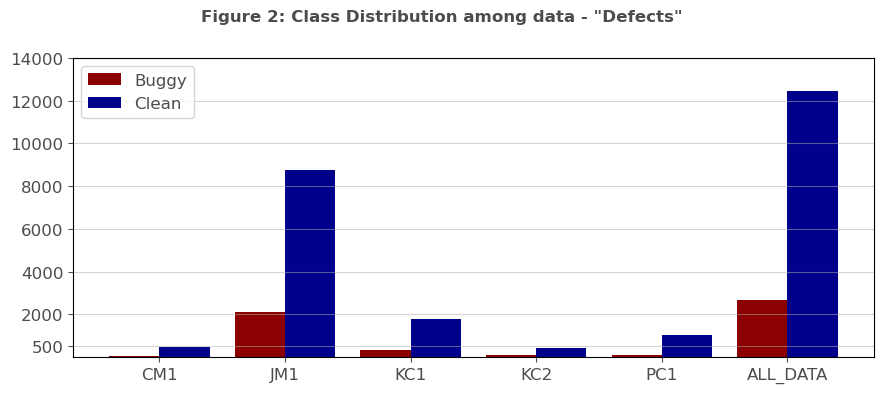

In [3]:
clear_output()
output = data_summary('Datasets_Summ', 'Name')

# the first element of the output is an HTML object 
# display the HTML representation of the df within an IPython environment
# display() is used to display any kind of object in the Jupyter notebook
display(output[0])
print()
plt.show()

<br>

Datasets were downloaded from the PROMISE repositiory in ARFF format.
The ARFF (*Attribute-Relation File Format*) is a file format used by the WEKA machine learning software to store data sets. It is a text file format that has a structure that is similar to a CSV (*Comma-Separated Values*) file, but with additional information that specifies the name and data type of each attribute in the data set. This additional information makes it easier for machine learning algorithms to interpret the data and use it for training and evaluation.
I wrote a function,`arff_tocsv()`, to load data from ARFF files and save the resulting dataframes as CSV files. The `sets_str` list specifies the names of the ARFF files to be loaded.

A combined dataframe **ALL_DATA** is also needed for the analysis.

In [4]:
%%capture --no-stderr 
# Load data from ARFF files
# Save the resulting dataframes as CSV files. 

# Define the list of ARFF file names to be loaded
sets_str = ['cm1','kc1', 'kc2', 'pc1','jm1']

# Iterate over the file names
for elem in sets_str:
    # Create a string that defines a variable named after the element
    # and assigns the output of the function to it
    exec_string = f"{elem} = arff_tocsv('{elem}')"

    # Execute the string as Python code to create and assign the variable
    exec(exec_string)

# Concatenate all of the dataframes into a single dataframe
sets = [cm1, jm1, kc1, kc2, pc1]
all_data = pd.concat(sets, join="inner", ignore_index=True)

# Save the concatenated dataframe as a CSV file
file_path = os.path.join(DATA_PATH, "all_data.csv")
with open(file_path, "w") as f:
    all_data.to_csv(f)

Here's a summary and a preview of one of the datasets (**JM1**). As already mentioned, this is the variable list shared across all of them.

In [5]:
jm1.info()
jm1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               10885 non-null  int32  
 1   v(g)              10885 non-null  int32  
 2   ev(g)             10885 non-null  int32  
 3   iv(g)             10885 non-null  int32  
 4   n                 10885 non-null  int32  
 5   v                 10885 non-null  float64
 6   l                 10885 non-null  float64
 7   d                 10885 non-null  float64
 8   i                 10885 non-null  float64
 9   e                 10885 non-null  float64
 10  b                 10885 non-null  float64
 11  t                 10885 non-null  float64
 12  lOCode            10885 non-null  int32  
 13  lOComment         10885 non-null  int32  
 14  lOBlank           10885 non-null  int32  
 15  lOCodeAndComment  10885 non-null  int32  
 16  uniq_Op           10885 non-null  int32 

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1,1,1,1,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1,1,1,1,1,0
1,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,1
2,72,7,1,6,198,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,1
3,190,3,1,3,600,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,1
4,37,4,1,4,126,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,1


<br>

In [6]:
# Reproducing Table 1 just for checking

# Define the list of dataframes and the corresponding labels
sets = [cm1, kc1, kc2, pc1, jm1, all_data]
sets_str = ['cm1','kc1','kc2','pc1','jm1','all_data']

# Create an empty dataframe 
table1 = pd.DataFrame()

# Iterate over the dataframes and labels
for i, elem in enumerate(sets):
    # Compute the number of rows and number of buggy instances
    num_rows = len(elem.index)
    num_buggy = elem['defects'].sum()

    # Create a new dataframe with a single row for the current dataframe
    row = pd.DataFrame({"Instances":num_rows,
                        "Buggy":num_buggy,
                        "Clean":(num_rows - num_buggy),
                        "Imbalance Ratio":round((num_buggy)/(num_rows - num_buggy), 3)}, 
                        index=[sets_str[i]])

    # Append the row to the table1 dataframe
    table1 = pd.concat([table1, row])

df_display(table1, 'Table 1: Summary of Datasets')

,Instances,Buggy,Clean,Imbalance Ratio
cm1,498,49,449,0.109
kc1,2109,326,1783,0.183
kc2,522,107,415,0.258
pc1,1109,77,1032,0.075
jm1,10885,2106,8779,0.240
all_data,15123,2665,12458,0.214


***

## Effectiveness of Metrics <a class='anchor' id='metrics'></a>

In the paper, attributes *#1, #2, #3 and #4* are selected as features to build the quality predictors.
The selected features are the McCabe’s Complexity metrics *(Thomas, 1976)*. These are static code metrics and in direct association with the quality of the software. The correlation among the selected features for the classes is shown in **Figure 4** and **Figure 5**.
The reason of using static code metrics as predictors is two-fold:
- **First**, these attributes are successfully used and widely accepted to predict the software defects and quality;
- **Second**, these metrics can be computed very easily at low costs.

Here's a brief description of these four features:

- **Lines of Code `LOC`**: The LOC count is usually for executable statements. It is actually a count of instruction statements according to McCabe's line counting conventions.
- **Cyclomatic Complexity `v(G)`**: Measures the number of "linearly independent paths". A set of paths is said to be linearly independent if no path in the set is a linear combination of any other paths in the set through a program's "flowgraph". $v(G)$ is calculated by $v(G) = e - n + 2$ where $G$ is a program's flowgraph, $e$ is the number of arcs in the flowgraph, and $n$ is the number of nodes in the flowgraph. The standard McCabe rules ( $v(G)>10$ ), are used to identify fault-prone module.
- **Essential Complexity `ev(G)`**: It is a measure of the inherent complexity of a software system. It is the extent to which a flowgraph can be "reduced" by decomposing all the subflowgraphs of $G$ that are "D-structured primes". $ev(G)$ is calculated using $ev(G)= v(G) - m$ where $m$ is the number of subflowgraphs of "G" that are D-structured primes.
- **Design Complexity `iv(G)`**: It is the cyclomatic complexity of a module's reduced flowgraph.  The flowgraph, $G$, of a module is reduced to eliminate any complexity which does not influence the interrelationship between design modules. According to McCabe, this complexity measurement reflects the modules calling patterns to its immediate subordinate modules.

The McCabe metrics are based on the idea that the complexity of a software system can be measured by counting *the number of linearly independent paths* through the software system. This corresponds to the cyclomatic number metric from classical graph theory applied to software systems. The metrics assume that the more linearly independent paths there are through a software system, the more complex the system is, and the more effort is required to develop and maintain it.

This code cell uses the `varselect_tocsv()` function defined in the *functions.ipynb* module to select a subset of columns from each dataframe in the `sets_str` list, and save the resulting dataframes as CSV files. The `varnames` and `outnames` lists specify the columns to be selected and the names to be used for the new variables and CSV files, respectively.


In [7]:
%%capture --no-stderr 
# For each Dataset, selects McCabe metrics and response and store as a .csv

# Define the list of variable names to be selected
varnames = ['loc', 'v(g)', 'ev(g)', 'iv(g)','defects']

# Define the list of output names for the CSV files
outnames = ['cm1_mc','kc1_mc', 'kc2_mc', 'pc1_mc', 'jm1_mc', 'all_data_mc']

# Iterate over the dataframes and output names
for df, outname in zip(sets_str, outnames):
    # Create a string that defines a variable named after each outname
    # and assigns the output of the function to it
    exec_string = f"{outname} = varselect_tocsv({df}, varnames, '{outname}')"
    
    # Execute the string as Python code to create and assign the variable
    exec(exec_string)

In [39]:
jm1_mc.info()
df_display(jm1_mc.drop('defects', axis = 1).describe(),'Table 2. Summary Statistics of JM1 Dataset', decimals=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   loc      10885 non-null  int32
 1   v(g)     10885 non-null  int32
 2   ev(g)    10885 non-null  int32
 3   iv(g)    10885 non-null  int32
 4   defects  10885 non-null  int32
dtypes: int32(5)
memory usage: 212.7 KB


,loc,v(g),ev(g),iv(g)
count,10885.0,10885.0,10885.0,10885.0
mean,42.0,6.3,3.4,4.0
std,76.6,13.0,6.8,9.1
min,1.0,1.0,1.0,1.0
25%,11.0,2.0,1.0,1.0
50%,23.0,3.0,1.0,2.0
75%,46.0,7.0,3.0,4.0
max,3442.0,470.0,165.0,402.0


<br>

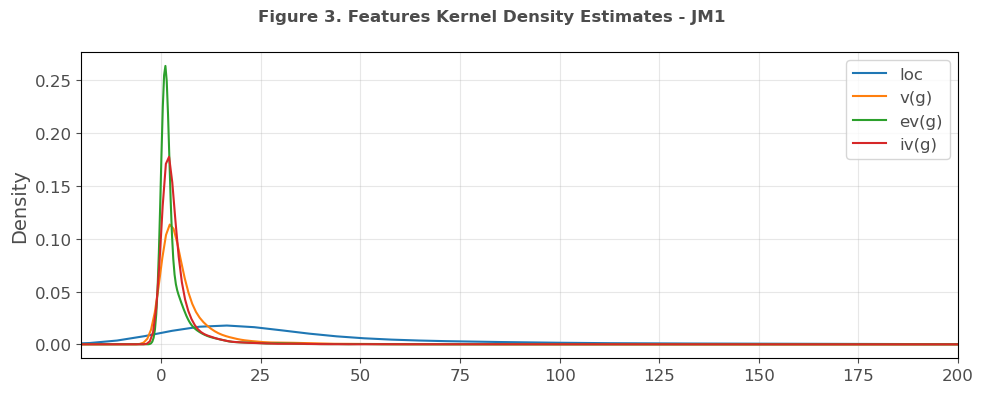

In [18]:
# Clear any previous output
clear_output()

# Plot the kernel density estimate for jm1_mc
jm1_mc.drop('defects', axis=1).plot.kde(figsize=(10,4))

# Set the x-axis limits
plt.xlim((-20, 200))

# Add gridlines with low alpha value to make them slightly transparent
plt.grid(alpha=0.3)

# Add a title to the plot
plt.suptitle('Figure 3. Features Kernel Density Estimates - JM1',
               fontsize=12, fontweight='bold')

# Save the figure to a file
save_fig('KDE_plot')

# Display the plot
plt.show()

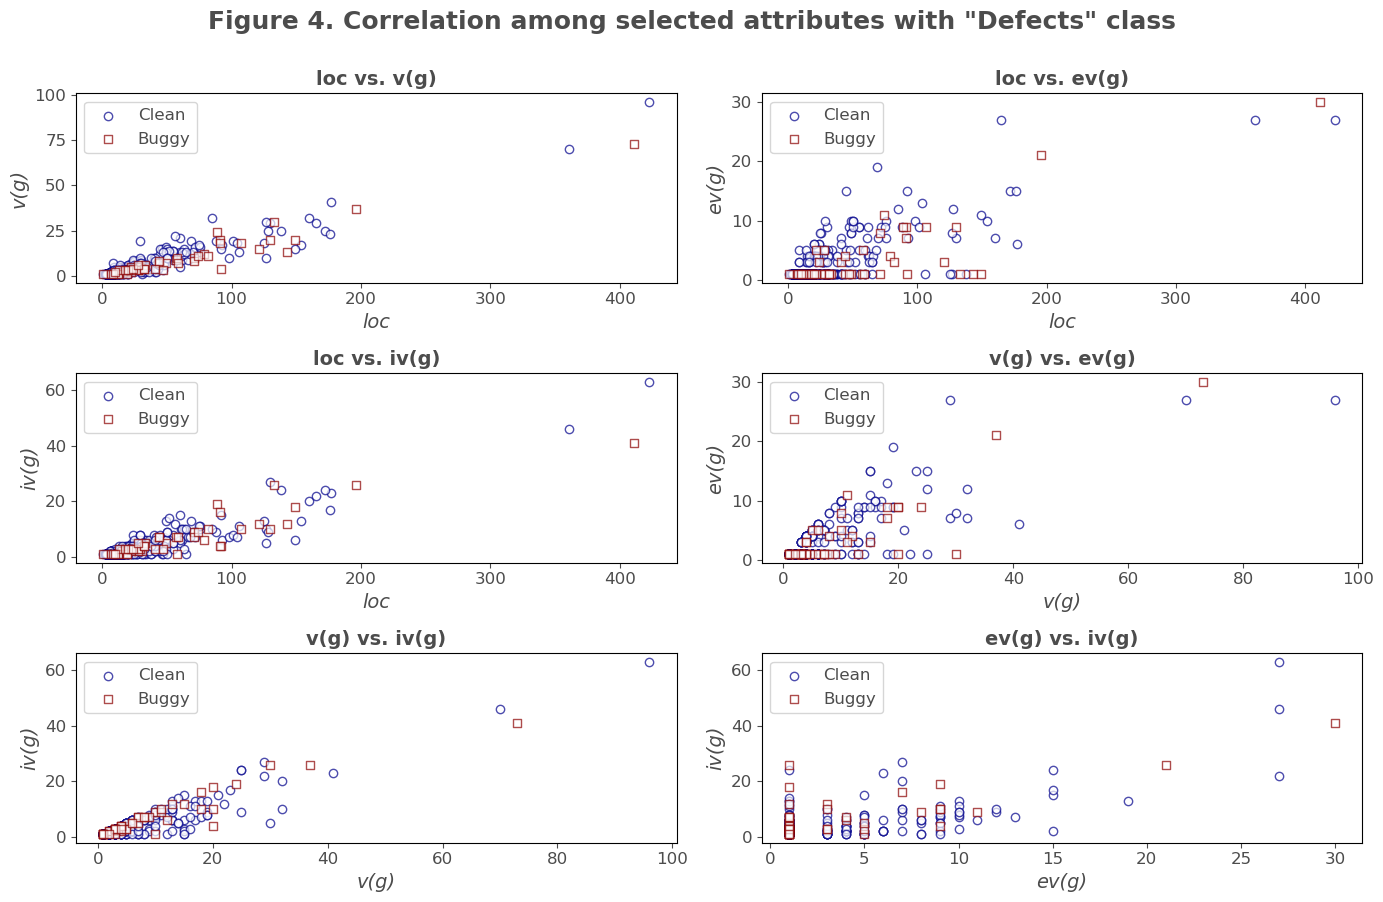

In [12]:
# Clear any previous output
clear_output()

# create a figure and a set of subplots with 3 rows and 2 columns
fig, ax = plt.subplots(3,2, figsize=(14,9))

# create a scatter plot for each features combination and axes
scatter_custom('loc','v(g)', cm1_mc, ax=ax[0,0])
scatter_custom('loc','ev(g)', cm1_mc, ax=ax[0,1])
scatter_custom('loc','iv(g)', cm1_mc, ax=ax[1,0])
scatter_custom('v(g)','ev(g)', cm1_mc, ax=ax[1,1])
scatter_custom('v(g)','iv(g)', cm1_mc, ax=ax[2,0])
scatter_custom('ev(g)','iv(g)', cm1_mc, ax=ax[2,1])

# adjust the layout of the subplots
plt.tight_layout()

# set a title for the figure
fig.suptitle('Figure 4. Correlation among selected attributes with "Defects" class',
               fontsize=18, fontweight='bold', y=1.00)

# save the figure to a file
save_fig('corr_scatterplot')

# show the figure
plt.show()

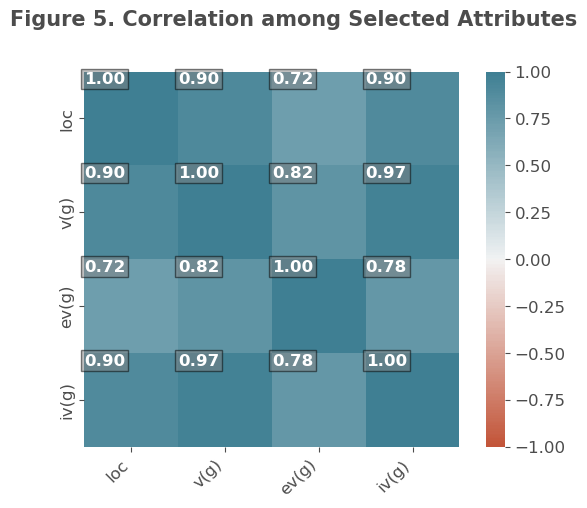

In [15]:
fig, ax = plt.subplots(figsize=(6,5))
# # Calculate correlation matrix of the features
corr = kc1_mc.iloc[:, :-1].corr()

# Plot the correlation matrix as heatmap using Seaborn library
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Rotate the x-axis labels for better visualization
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

# Set a title for the figure
fig.suptitle('Figure 5. Correlation among Selected Attributes',
            fontsize=15, fontweight='bold', y=1.00)

# Annotate individual values in the heatmap
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, "{:.2f}".format(corr.iloc[i, j]),
                       ha="left", va="top", color="w",
                       fontsize=12, fontweight='bold',
                       backgroundcolor='gray', bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 2})

# Save the figure to a file
save_fig('corr_matrix')

*** 

## Methods <a class='anchor' id='methods'></a>

The prediction models are built using Supervised Learning approaches which proved to be promising
in this research field (**Cfr.** *Summary of literature on software quality prediction* in the original paper). The techniques used to build our prediction models are artificial neural network, support vector machine, naïve-bayes
classifier, classification trees and k-nearest neighbor (*Mitchell, 1997*). Each of these 5 classifiers is trained, validated and tested using **10-fold cross-validation** for all the 6 *reduced* datasets (CM1, KC1, KC2, PC1, JM1 and ALL_DATA) resulting in 30 prediction models:

- **Artificial Neural Network**: ANNs are Multilayer Perceptrons used for classification and regression. The standard multilayer perceptron (MLP) is a cascade of single-layer perceptrons "stacked" together. Single-layer networks have just one layer of active units. Inputs connect directly to the outputs through a single layer of weights. The outputs do not interact, so a network with N outputs can be treated as N separate single-output networks. In a MLP there is a layer of input nodes (*4 here*), an output layer that produces the output variables (*here the probability of the positive class*), and one or more intermediate layers. The interior layers are sometimes called “hidden layers” because they are not directly observable. In this analysis, a **MLP with one hidden layer** will be used. 
- **Support Vector Machine**: The idea behind the SVM algorithm is to find the best boundary (or "hyperplane") that separates the different classes in the data. This boundary is chosen in such a way that it maximizes the margin, which is the distance between the boundary and the closest data points from each class. Once the boundary is determined, new data can be classified based on which side of the boundary it falls on. Such (linear or not) boundary is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the support vectors. The support vector machine (SVM) is an extension of the support vector classier that results from enlarging the feature space in a specific way, using kernels. In our prediction models, the **RBF** kernel is used;

- **Decision Tree**: non-parametric, supervised learning method used for classification and regression. They are based on the idea of recursive partitioning of the feature space into smaller and smaller subsets, eventually resulting in a tree-like model of decisions. In our prediction models, the **CART** algorithm is used;

- **Gaussian Naïve-Bayes**: an approximation of the Bayes classifier under the assumption of independence between every pair of features. Here, it is also based on the concept that within each class, the $jth$ predictor is drawn from a (univariate) normal distribution. The algorithm first calculates the probability of a data point belonging to each class, given the feature values of the data point, it then selects the class with the highest probability as the prediction for the data point; 

- **K-Nearest Neighbors**: a supervised ML algorithm that works by finding the *k* data points in the training set that are closest to the input data point $x_0$ and uses those data points to make a prediction. The class conditional probabilities are estimated as the fraction of points in in the neighbour set whose response corresponds to each certain $jth$ class. Finally, KNN classifies the test observation $x_0$ to the class with the largest of these probabilities. The nearest neighbour class of classifiers adapts the amount of smoothing to the local density of data. The degree of smoothing is controlled by the hyperparameter $k$. In the original paper, $k = 10$.

***

## Performance Evaluation Criteria <a class='anchor' id='criteria'></a>

The comparison among the prediction models is made by evaluation the performance of individual classifiers over the following criteria:

- **Confusion Matrix:** The general idea of a confusion matrix is to count the number of times instances of class $A$ are classified as class $B$, for all $A/B$ pairs. To compute the confusion matrix, we first need to have a set of predictions so that they can be compared to the actual targets. What is typically done is making predictions on the test set, but it’s not available here, yet. Instead, I used the `cross_val_predict()` function: just like the `cross_val_score()` function, `cross_val_predict()` performs k-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that we get an *“out-of-sample”* prediction for each instance in the training set (**the model makes predictions on data that it never saw during training**).
- **% Recall:** The cost of missing a 'buggy' instance is much higher than the misclassification of a 'clean' instance as 'buggy'. In the consideration of this view, the percentage of the actual 'buggy' modules correctly predicted is analyzed. The corresponding proportion is also known as sensitivity or recall or TPR of the predictor. This metric is generally preferred over the precision because a trivial way to have perfect precision is to create a classifier that always makes
negative predictions, except for one single positive prediction on the instance it’s most confident about. If this one prediction is correct, then the classifier has 100% precision.
- **ROC Curve:** The ROC curve is a popular graphic for simultaneously displaying the two types of errors for all possible thresholds. The overall performance of a classifier, summarized over all possible thresholds, is given by the area under the (ROC) curve (AUC). An ideal ROC curve will hug the top left corner, so **the larger area under the (ROC) curve the AUC the better the classifier.** the ROC curve plots the **TPR** (another name for recall) against the false positive rate (FPR). The FPR (also called the *fall-out*) is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 minus the true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative. The TNR is also called *specificity*. Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity. We expect a classifier that performs no better than chance to have an AUC of 0.5 (when evaluated on an independent test set not used in model training). **ROC curves are useful for comparing different classifiers, since they take into account all possible thresholds.**
- **Accuracy:** In supervised learning, Accuracy is the measure of the correctness of prediction model. It is defined as the ratio of correctly classified instances to the total number of the instances. The accuracy metric is often used when the target variable has balanced class distribution and the goal is to predict the correct class label. When this is not the case, a balanced version of the metric can be used: balanced accuracy is defined as the average of the accuracy of the classifier on each class. In other words, balanced accuracy is a measure of how well a classifier is able to accurately predict samples from all classes, regardless of their size. It takes into account the class imbalance in the dataset, which can be a problem if one class is much more prevalent than the other.

***

<br>

# Analysis <a class='anchor' id='analysis'></a>
The models in this study were trained, tested, and validated using a **10-fold cross-validation** method. However, the paper does not specify whether the authors employed a *nested or non-nested CV strategy.* Despite this, the results are comparable to those reported in the article and <u> do not exhibit any systematic overestimation of the metrics</u>. Further details about the validation process were not provided. Any discrepancies in the results can be attributed to differences in the experimental choices.
Furthermore, as stated in a later work (*Goyal, S. Handling Class-Imbalance with KNN (Neighbourhood) Under-Sampling for Software Defect Prediction. Artif Intell Rev 55, 2023–2064 (2022)*), **the class imbalance problem was not adressed at all**.

To assess the accuracy of the predictions, the researchers created confusion matrices for each of the 30 classifiers, grouped by the dataset used. These matrices, shown in Figures 6 through 16, allow for easy analysis of the classifiers' performance by counting the number of correctly classified "buggy" and "clean" data points.

Beneath each confusion matrix, the ROC curves of all 30 classifiers are also displayed, grouped by the dataset used. The legends include the corresponding AUC measures with standard deviation.

When using a Randomized Search CV, the number of parameter settings sampled is dependent on the dimensionality of the analyzed dataset and is limited by our own computational power. Notice that the `n_iter` parameter balances runtime and the quality of the final solution.

## 1️⃣  CM1 <a class='anchor' id='cm1'></a>

Text(0.5, 1.1, 'Figure 6. Confusion Matrix for Classifiers using CM1 Dataset')

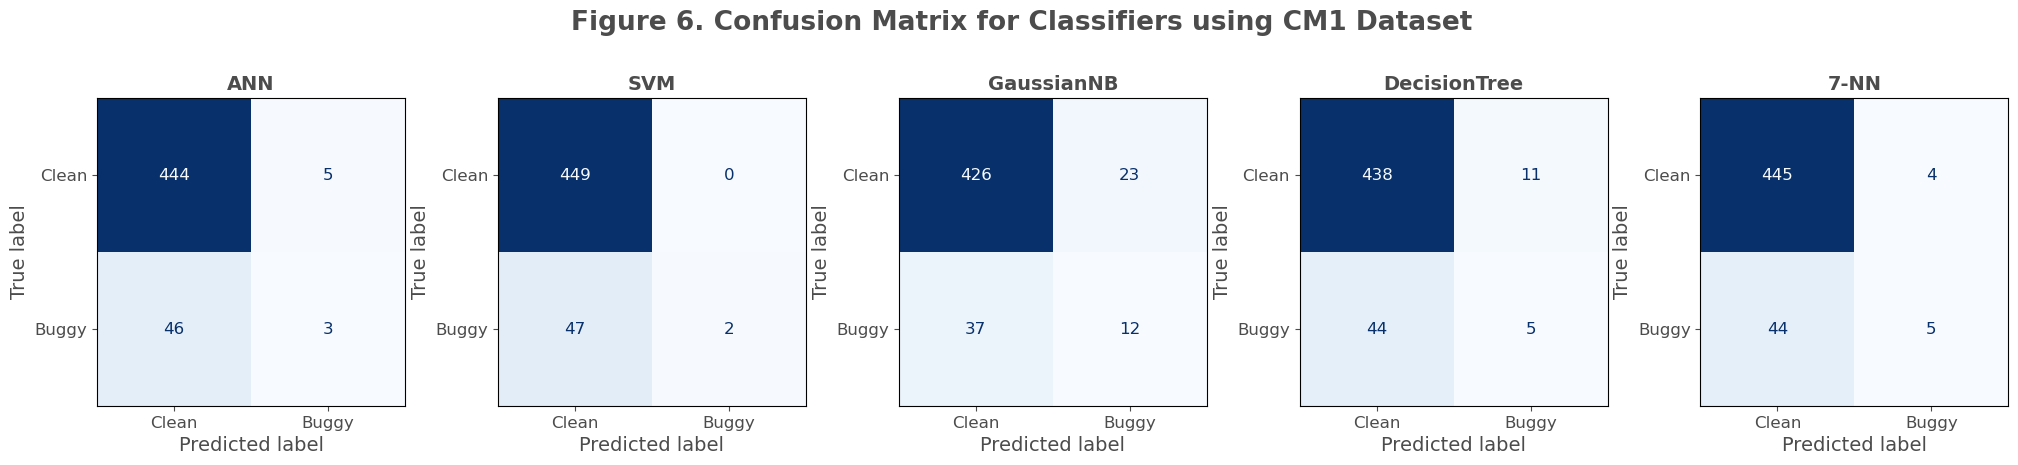

In [25]:
models_list = [{'model': ann_cv, 'n_iter':150, 'solver':'lbfgs'},
               {"model": svm_cv, "n_iter":150, 'probability':True},
               {"model": nbayes_cv},
               {'model': tree_cv},
               {"model": knn_cv}]

cm1_res = compare_classifiers(cm1_mc, models_list, 'cm1_results')
plt.suptitle('Figure 6. Confusion Matrix for Classifiers using CM1 Dataset',
               fontsize=19, fontweight='bold', y=1.1)

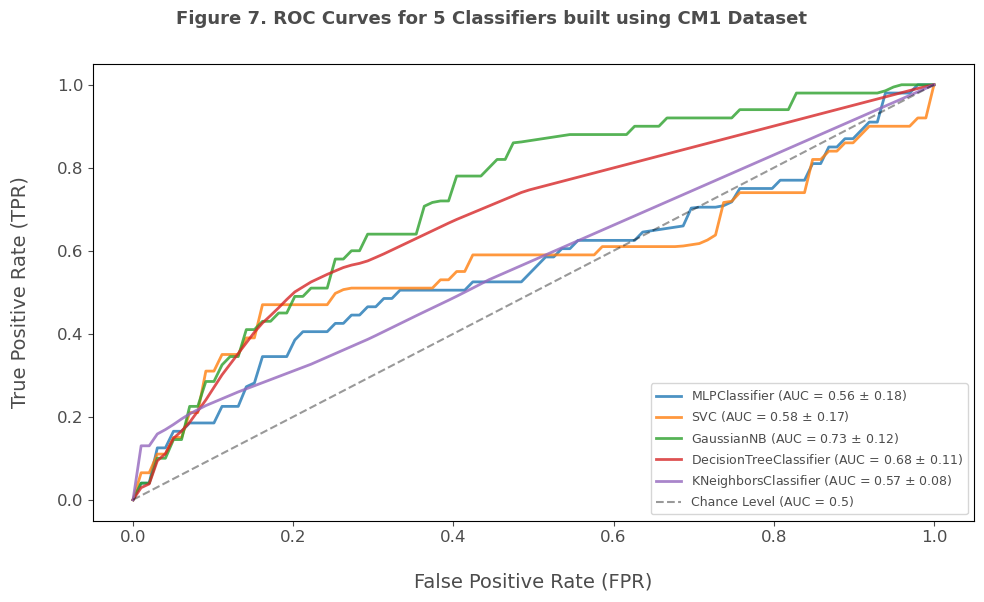

In [19]:
cm1_auc = compare_roc(cm1_mc, cm1_res['models'])
plt.suptitle('Figure 7. ROC Curves for 5 Classifiers built using CM1 Dataset',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('cm1_roc')

## 2️⃣  KC1 <a class='anchor' id='kc1'></a>

Text(0.5, 1.1, 'Figure 8. Confusion Matrix for 5 Classifiers using KC1 Dataset')

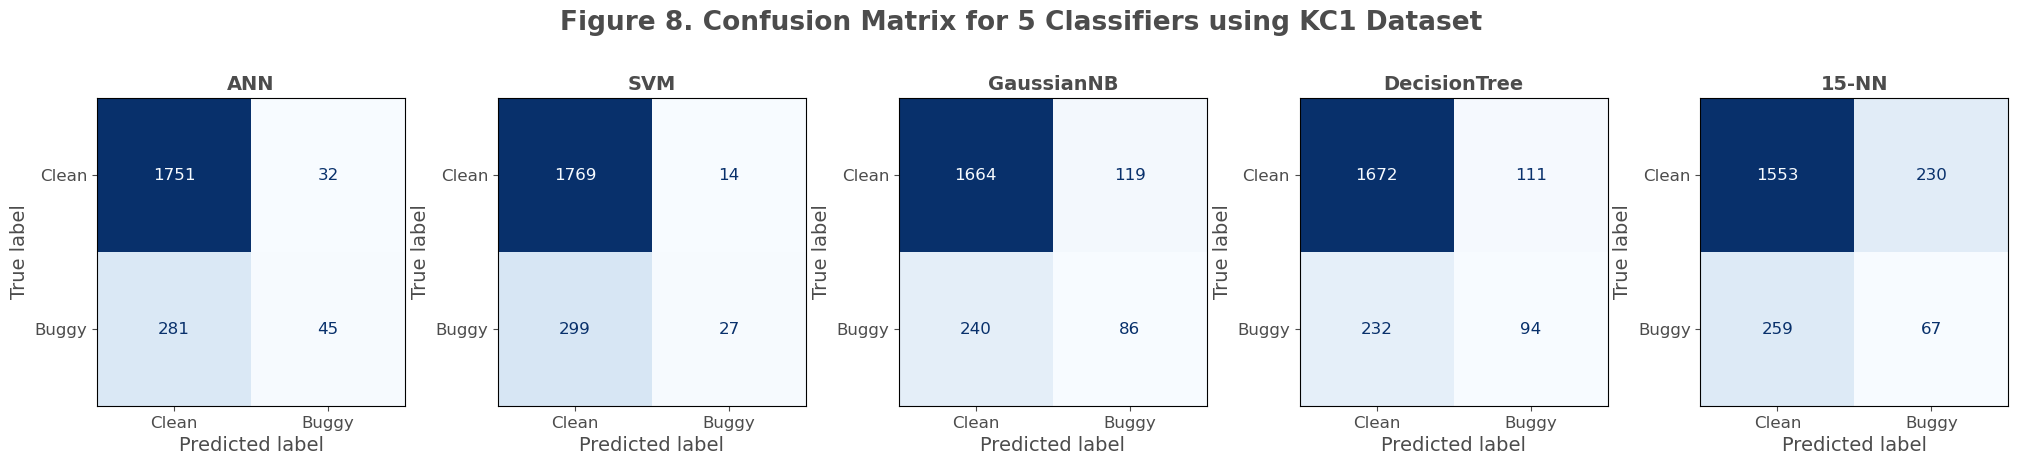

In [27]:
models_list = [{'model': ann_cv, 'n_iter':60},
               {"model": svm_cv, "n_iter":50, 'probability':True},
               {"model": nbayes_cv},
               {'model': tree_cv},
               {"model": knn_cv}]

kc1_res = compare_classifiers(kc1_mc, models_list, 'kc1_results')
plt.suptitle('Figure 8. Confusion Matrix for 5 Classifiers using KC1 Dataset',
               fontsize=19, fontweight='bold', y=1.1)

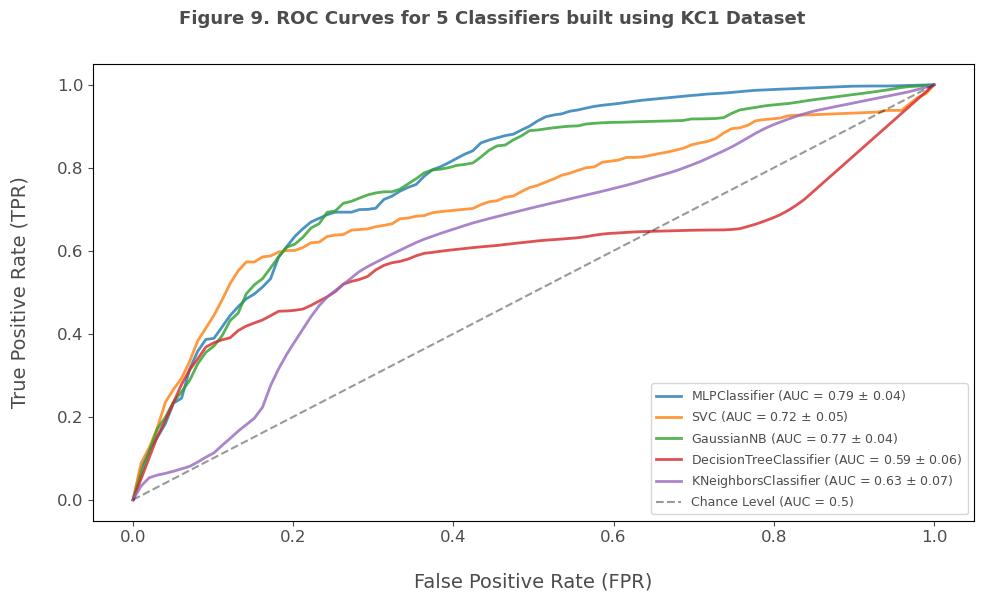

In [20]:
kc1_auc = compare_roc(kc1_mc, kc1_res['models'])
plt.suptitle('Figure 9. ROC Curves for 5 Classifiers built using KC1 Dataset',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('kc1_roc')

## 3️⃣ KC2 <a class='anchor' id='kc2'></a>

Text(0.5, 1.1, 'Figure 10. Confusion Matrix for 5 Classifiers using KC2 Dataset')

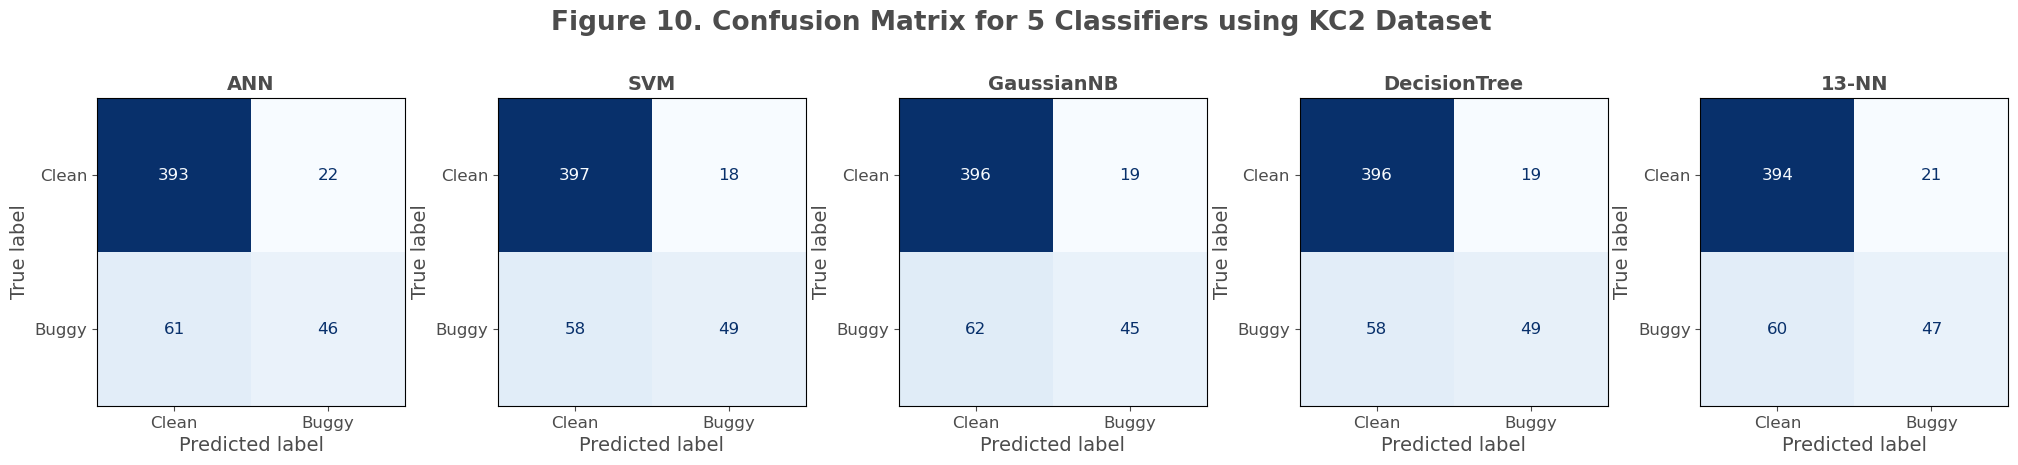

In [30]:
models_list = [{'model': ann_cv, 'n_iter':200, 'solver':'lbfgs'},
               {"model": svm_cv, "n_iter":200, 'probability':True},
               {"model": nbayes_cv},
               {'model': tree_cv},
               {"model": knn_cv}]

kc2_res = compare_classifiers(kc2_mc, models_list, 'kc2_results')
plt.suptitle('Figure 10. Confusion Matrix for 5 Classifiers using KC2 Dataset',
               fontsize=19, fontweight='bold', y=1.1)

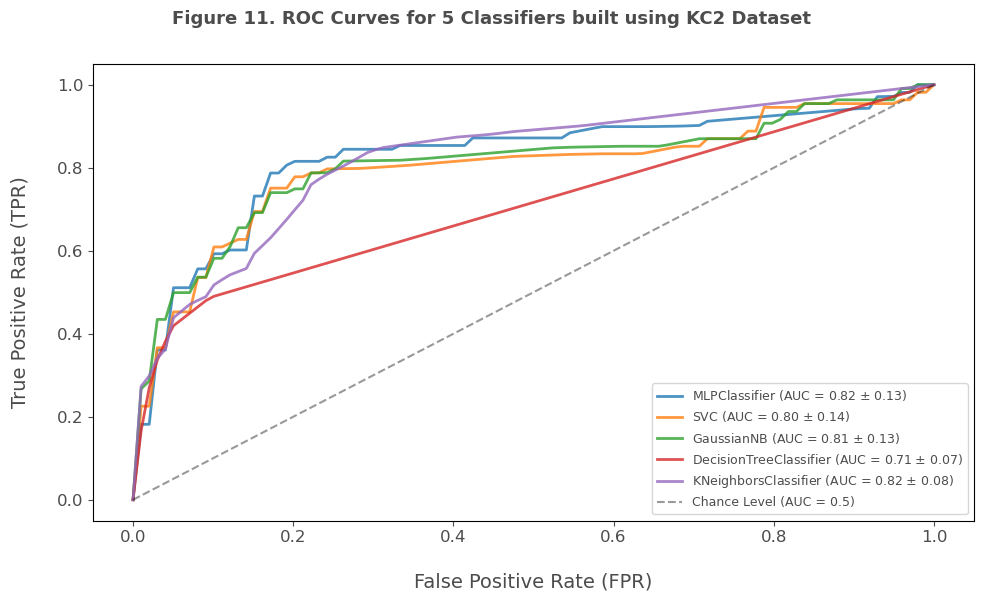

In [21]:
kc2_auc = compare_roc(kc2_mc, kc2_res['models'])
plt.suptitle('Figure 11. ROC Curves for 5 Classifiers built using KC2 Dataset',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('kc2_roc')

## 4️⃣ PC1 <a class='anchor' id='pc1'></a>

Text(0.5, 1.1, 'Figure 12. Confusion Matrix for 5 Classifiers using PC1 Dataset')

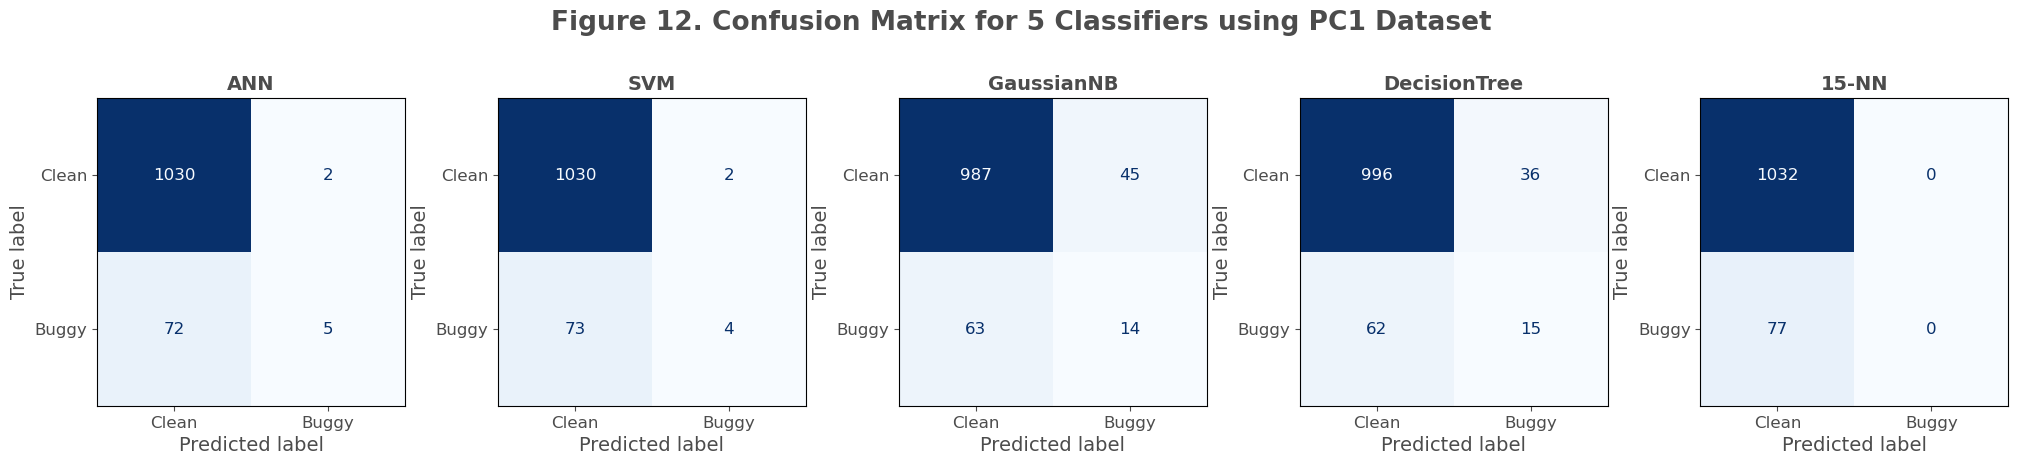

In [32]:
models_list = [{'model': ann_cv, 'n_iter':100},
               {"model": svm_cv, "n_iter":70, 'probability':True},
               {"model": nbayes_cv},
               {'model': tree_cv},
               {"model": knn_cv}]

pc1_res = compare_classifiers(pc1_mc, models_list, 'pc1_results')
plt.suptitle('Figure 12. Confusion Matrix for 5 Classifiers using PC1 Dataset',
               fontsize=19, fontweight='bold', y=1.1)

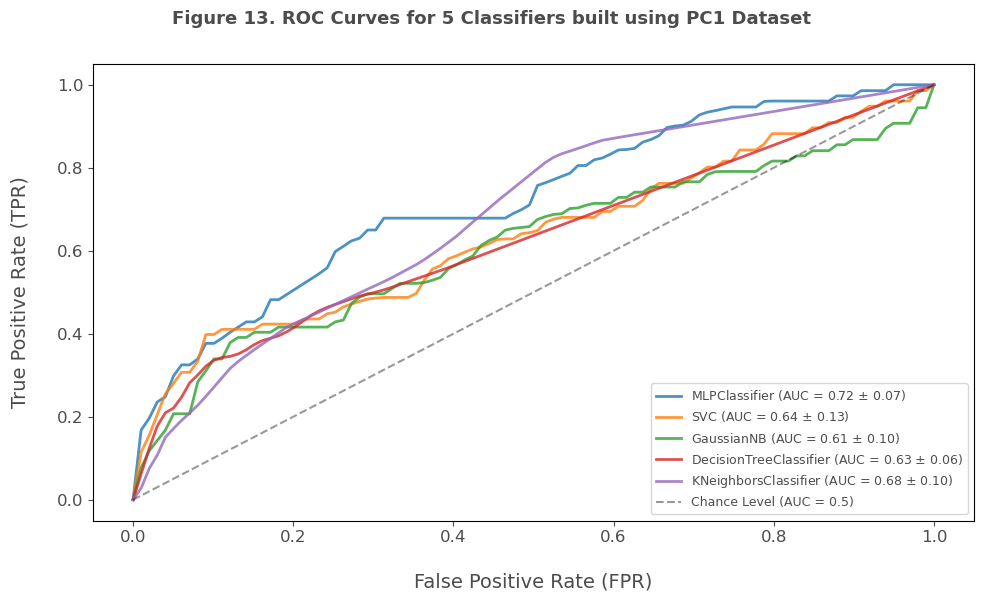

In [22]:
pc1_auc = compare_roc(pc1_mc, pc1_res['models'])
plt.suptitle('Figure 13. ROC Curves for 5 Classifiers built using PC1 Dataset',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('pc1_roc')

## 5️⃣ JM1 <a class='anchor' id='jm1'></a>

Text(0.5, 1.1, 'Figure 14. Confusion Matrix for 5 Classifiers using JM1 Dataset')

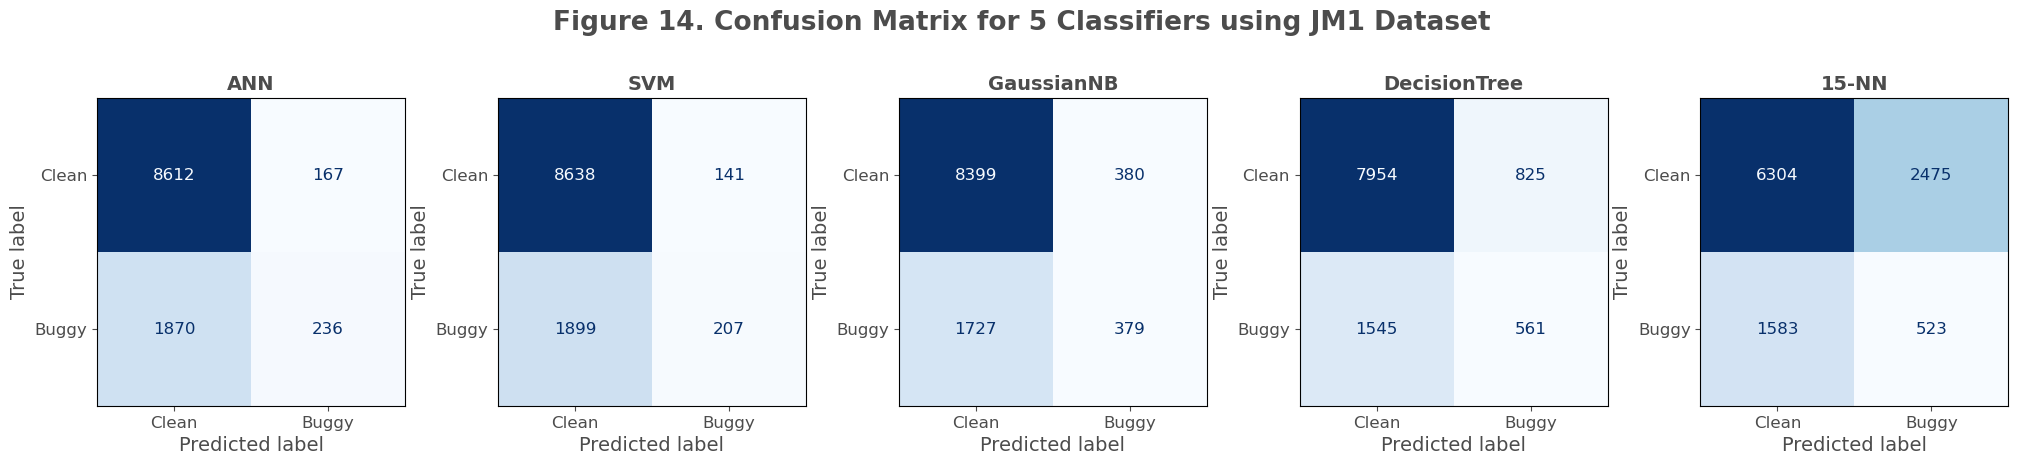

In [9]:
models_list = [{'model': ann_cv, 'n_iter':50, 'early_stopping':True},
               {"model": svm_cv, "n_iter":50, 'probability':True},
               {"model": nbayes_cv},
               {'model': tree_cv},
               {"model": knn_cv}]

jm1_res = compare_classifiers(jm1_mc, models_list, 'jm1_results')
plt.suptitle('Figure 14. Confusion Matrix for 5 Classifiers using JM1 Dataset',
               fontsize=19, fontweight='bold', y=1.1)

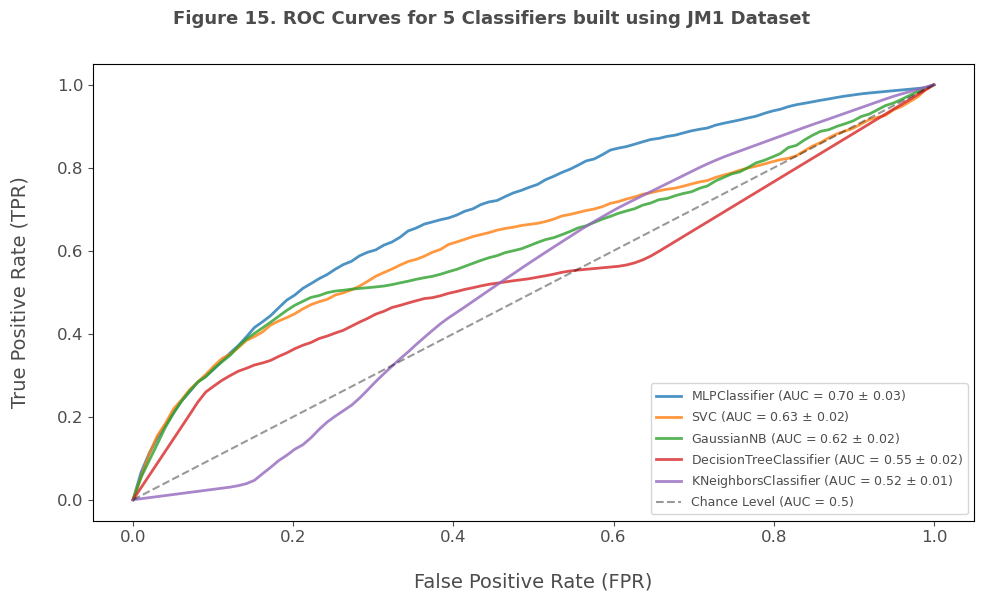

In [23]:
jm1_auc = compare_roc(jm1_mc, jm1_res['models'])
plt.suptitle('Figure 15. ROC Curves for 5 Classifiers built using JM1 Dataset',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('jm1_roc')

## 6️⃣ ALL_DATA <a class='anchor' id='all_data'></a>

Text(0.5, 1.1, 'Figure 16. Confusion Matrix for 5 Classifiers using ALL_DATA Dataset')

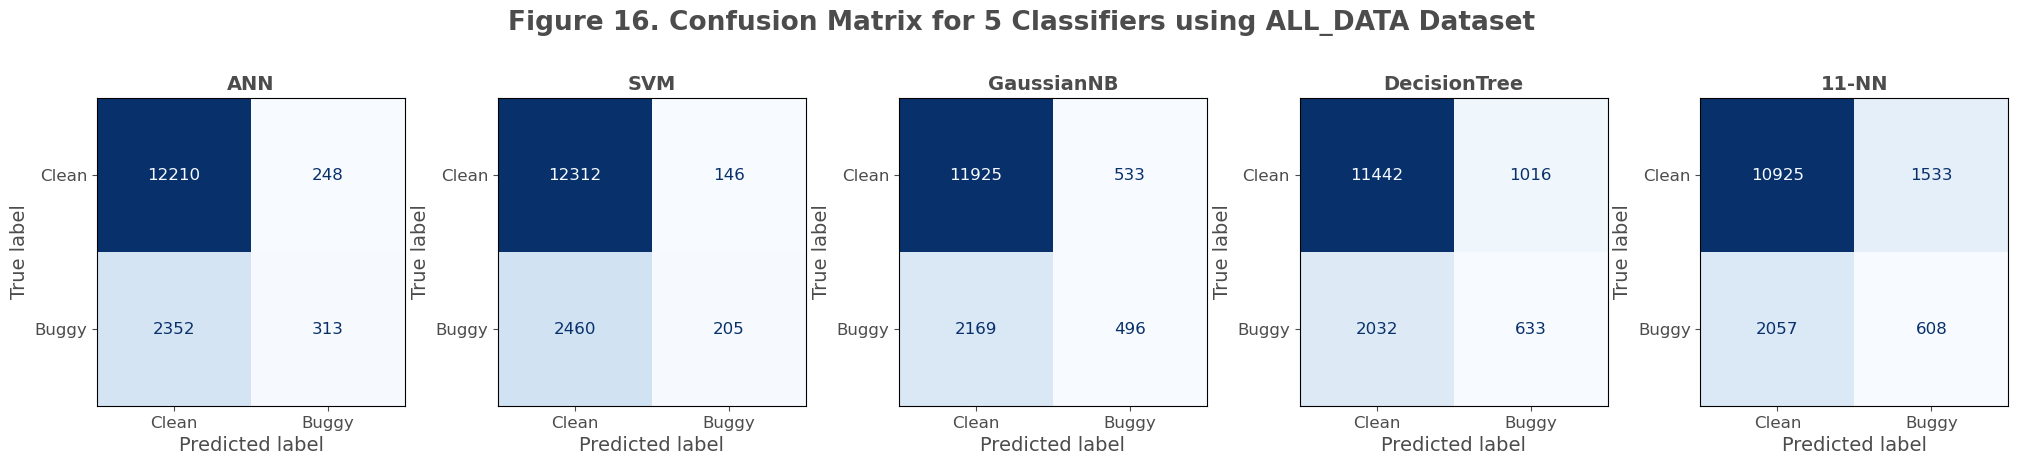

In [8]:
models_list = [{'model': ann_cv, 'n_iter':40, 'early_stopping':True},
               {"model": svm_cv, "n_iter":30, 'probability':True},
               {"model": nbayes_cv},
               {'model': tree_cv},
               {"model": knn_cv}]

all_data_res = compare_classifiers(all_data_mc, models_list, 'all_data_results')
plt.suptitle('Figure 16. Confusion Matrix for 5 Classifiers using ALL_DATA Dataset',
               fontsize=19, fontweight='bold', y=1.1)

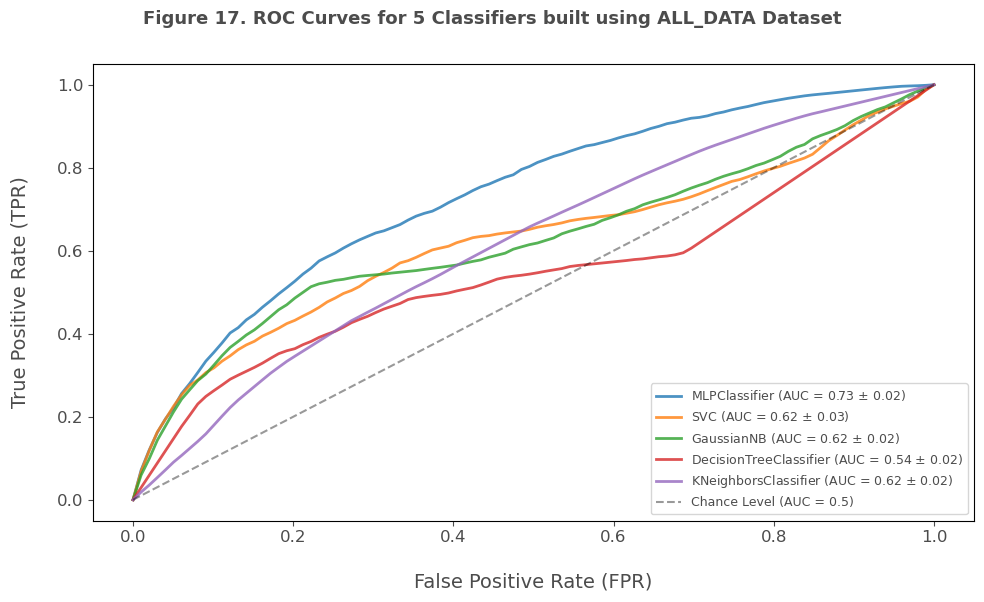

In [9]:
all_data_auc = compare_roc(all_data_mc, all_data_res['models'])
plt.suptitle('Figure 17. ROC Curves for 5 Classifiers built using ALL_DATA Dataset',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('all_data_roc')

***

# Results <a class='anchor' id='results'></a>

In [33]:
# Collect the metrics computed on each dataset and classifier
results = [cm1_res, kc1_res, kc2_res, pc1_res, jm1_res, all_data_res]
keys = ['accuracy', 'recall', 'auc']

# Dictionary comprehension to stack the values associated with each key in the dictionaries in results
stacked_results = {key: np.stack([result[key] for result in results]) for key in keys}

In [34]:
# Stack the AUC measures computed in the compare_roc() function
stacked_aucs = np.vstack((cm1_auc, kc1_auc, kc2_auc, pc1_auc, jm1_auc, all_data_auc))

<br>

### Accuracy
The classifiers are initially evaluated based on the accuracy evaluation criteria. Table 3 lists the accuracy measure values for all 30 classifiers. ANN-PC1 and SVM-PC1 display the highest performance with an accuracy of $0.933$. The accuracies obtained are also depicted graphically in Figure 19.

To determine which machine learning technique is superior, box plots were generated for classifiers grouped by technique, as shown in Figure 18. The results indicate that both ANN and SVM classifiers perform better than the others on larger datasets. Among these two, SVM appears to be the best classifier, with strong performance even on smaller datasets.

In [38]:
# Create a Df from the 2-d array stored in the stacked_results dict under 'accuracy' key
accuracies = pd.DataFrame(stacked_results['accuracy'], index = sets_str, columns = ['ANN','SVM','NB','TREE','KNN'])
accuracies.to_csv(f'{RESULTS_PATH}/accuracies.csv', mode="w")

# Display the new dataframe using styling options
df_display(accuracies, 'Table 3. Accuracy Measure', highlight = True)

,ANN,SVM,NB,TREE,KNN
cm1,0.898,0.906,0.880,0.890,0.904
kc1,0.852,0.852,0.830,0.837,0.768
kc2,0.841,0.854,0.845,0.853,0.845
pc1,0.933,0.932,0.903,0.912,0.931
jm1,0.813,0.813,0.806,0.782,0.627
all_data,0.828,0.828,0.821,0.798,0.763


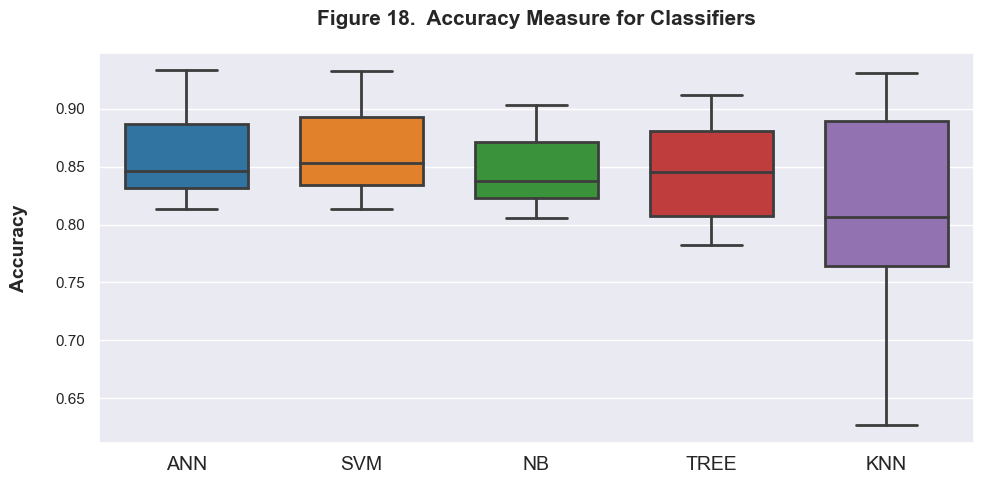

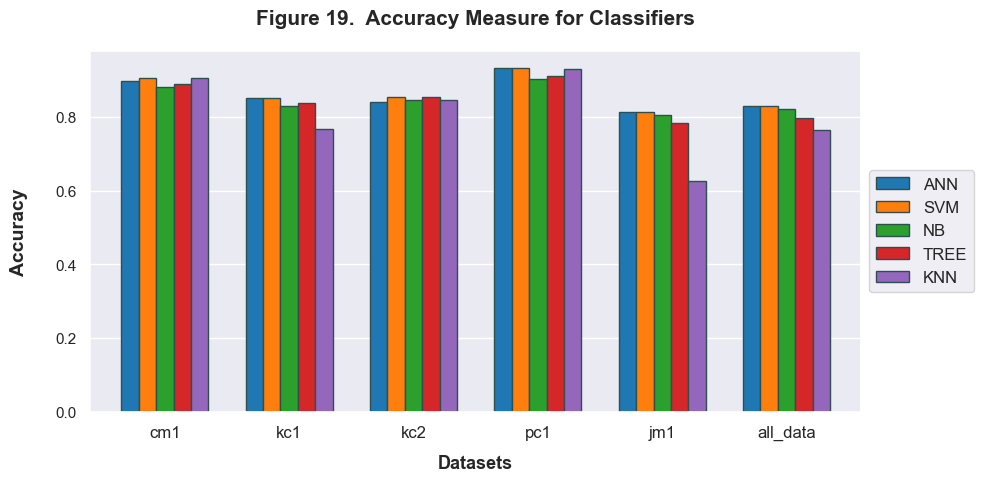

In [36]:
# Plot a boxplot and a barplot for the accuracy measures
plot_performance(accuracies, "Accuracy", save=True, fig_num = 18)

<br>

### % Recall

The cost of missing a "buggy" instance is greater than misclassifying a "clean" instance as "buggy." To avoid missing "risky" modules, the percentage of correctly predicted "buggy" modules is analyzed and presented in Table 4. 
<br>

- ANN has the highest recall on the KC2 dataset ($43.2$%) compared to other models;
- NB has the highest recall on the CM1 dataset ($24.5$%) compared to other models;
- TREE and KNN have similar recall percentages on most datasets;
- the TREE models performed the best across almost all the datasets;
- PC1 dataset has the lowest recall across all models, with KNN having a recall of $0$%.
<br>

Figure 21 provides a graphical analysis of the sensitivity of all 30 classifiers, grouped by machine learning method (*indicated by common color*). The results indicate that sensitivity is relatively high for most decision tree-based classifiers, although it is not satisfactory in absolute terms. Figure 20 provides a clearer representation of this property of decision tree classifiers using box plots.

In [36]:
# Create a Df from the 2-d array stored in the stacked_results dict under 'recall' key
recalls = pd.DataFrame(stacked_results['recall'], index = sets_str, columns = ['ANN','SVM','NB','TREE','KNN'])
recalls.to_csv(f'{RESULTS_PATH}/recalls.csv', mode="w")

# Display the new dataframe using styling options
df_display(recalls, 'Table 4. Correctly Classified Buggy Instances (%)', decimals = 1, highlight = True)

,ANN,SVM,NB,TREE,KNN
cm1,6.5,4.0,24.5,10.0,10.5
kc1,13.8,8.3,26.4,28.8,20.5
kc2,43.2,46.0,42.5,46.0,44.2
pc1,6.6,5.2,18.2,20.0,0.0
jm1,11.2,9.8,18.0,26.6,24.8
all_data,11.8,7.7,18.6,23.8,22.8


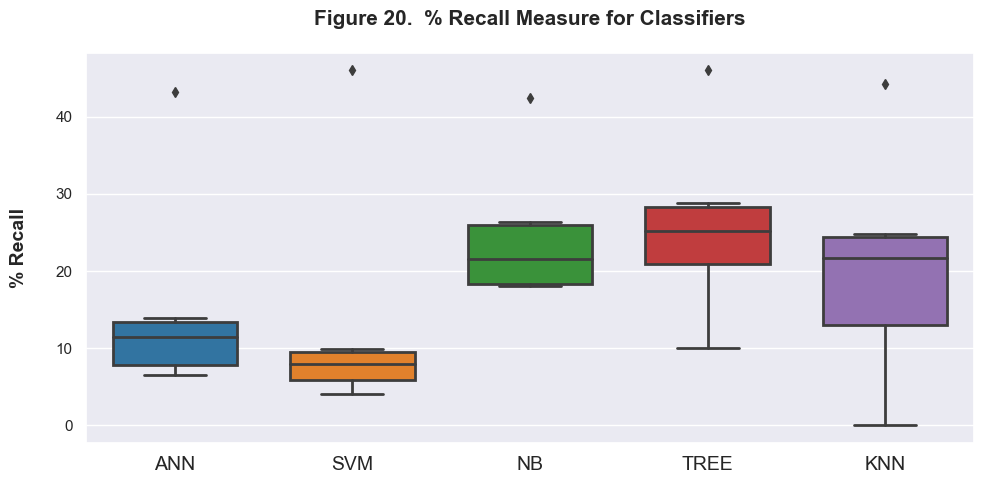

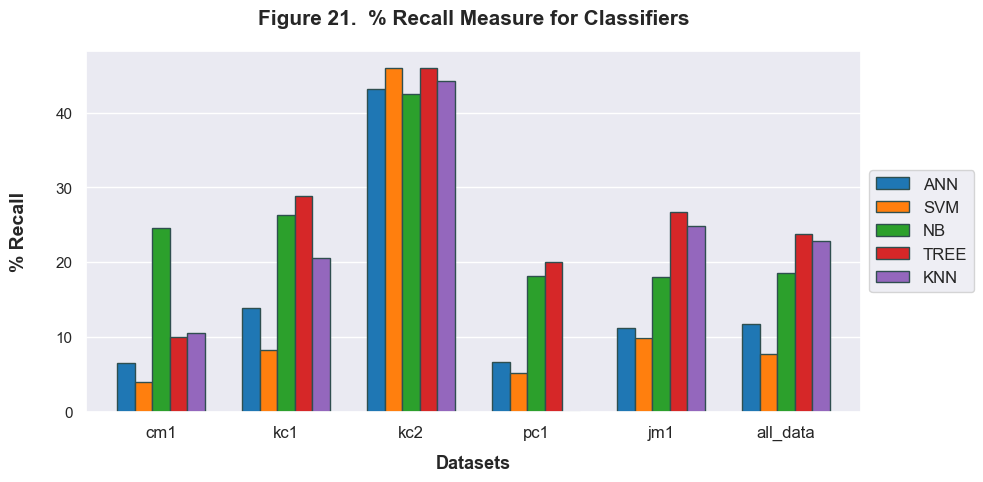

In [44]:
# Plot a boxplot and a barplot for the recall measures
plot_performance(recalls, "% Recall", save=True, fig_num = 20)

<br>

### AUC Measure
The next performance measure used is the Area Under the ROC Curve (AUC). The closer the AUC value is to 1, the higher the prediction accuracy of the classifier. Table 5 lists the AUC values for all 30 classifiers:
<br>
- The highest AUC was obtained on the kc2 dataset ($0.825$) by the ANN model even though it recorded the lowest accuracy and the second lowest recall on the same set;
<br> this may be due to the fact that **the ROC curve may be misleading when the positive class is rare or when we care more about the false positives than the false negatives.**
- The TREE model had the lowest AUC across three out of the five datasets
- Generally speaking, the performance of the models in terms of AUC was moderate to good, with most models having AUC scores above 0.5 on all datasets.

To determine which machine learning technique performs best in terms of AUC, box plots for the classifiers were generated, as shown in Figure 22. The results indicate that the ANN technique outperforms other machine learning techniques in terms of AUC, with the exception of the smallest CM1 dataset.

In [34]:
# Create a Df from the 2-d array stored in the stacked_results dict under 'AUC' key
aucs = pd.DataFrame(stacked_results['auc'], index = sets_str, columns = ['ANN','SVM','NB','TREE','KNN'])
aucs.to_csv(f'{RESULTS_PATH}/aucs.csv', mode="w")

# Display the new dataframe using styling options
df_display(aucs, 'Table 5. AUC measure', highlight=True)

,ANN,SVM,NB,TREE,KNN
cm1,0.568,0.574,0.725,0.679,0.570
kc1,0.791,0.723,0.772,0.593,0.630
kc2,0.825,0.798,0.807,0.707,0.820
pc1,0.722,0.637,0.614,0.627,0.680
jm1,0.705,0.631,0.618,0.548,0.520
all_data,0.733,0.622,0.625,0.543,0.620


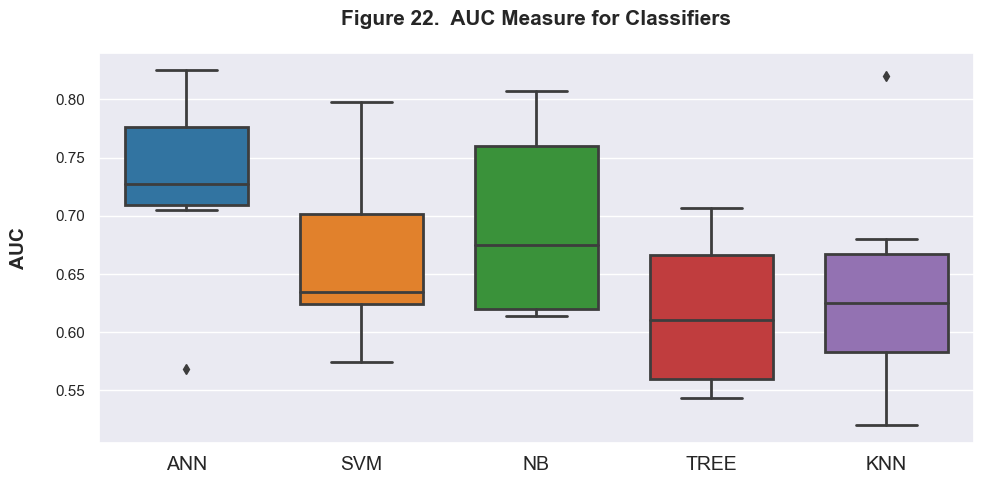

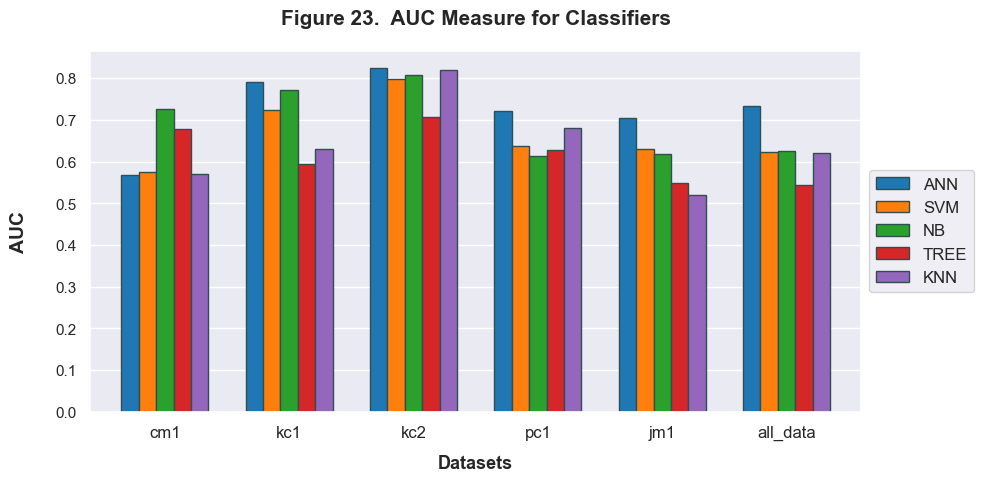

In [40]:
# Plot a boxplot and a barplot for the AUC measures
plot_performance(aucs, "AUC", save=True, fig_num = 22)

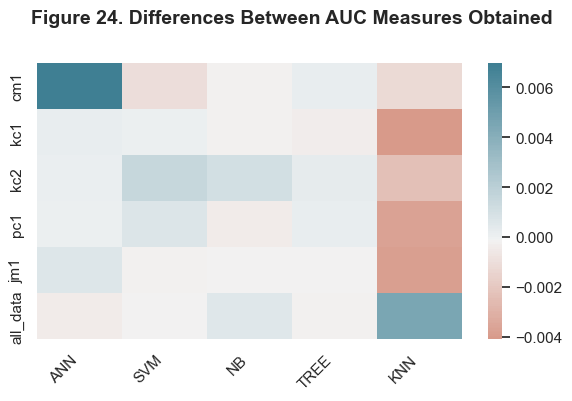

In [41]:
fig, ax = plt.subplots(figsize=(6,4))
# Compute the differences between the AUC measures obtained in different steps
auc_diff = stacked_results['auc'] - stacked_aucs

# Plot the correlation matrix as heatmap using Seaborn library
ax = sns.heatmap(
    pd.DataFrame(auc_diff, index = sets_str, columns = ['ANN','SVM','NB','TREE','KNN']), 
    vmin=np.min(auc_diff), vmax=np.max(auc_diff), center=np.median(auc_diff),
    cmap=sns.diverging_palette(20, 220, n=200)
)

# Rotate the x-axis labels for better visualization
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Set a title for the figure
fig.suptitle('Figure 24. Differences Between AUC Measures Obtained',
               fontsize=14, fontweight='bold', y=1.00)

# Save the figure to a file
save_fig('auc_diff')

<br>

***

# Conclusions <a class='anchor' id='conclusions'></a>

The findings of this study are obvious in part: ANN and SVM are among the most powerful and capable models that can be employed in supervised learning tasks and are widely used in various applications such as image and speech recognition, natural language processing, and predictive modeling. Both ANN and SVM have their own advantages and disadvantages, and the choice of which one to use depends on the specific problem and data being analyzed. ANNs are known for their ability to learn complex non-linear relationships between inputs and outputs, while SVMs shine with small to medium-sized non-linear datasets with outliers, especially in classification tasks. The ANN classifier built using the KC2 dataset has shown strong performance in terms of AUC, while the SVM classifier built using the PC1 dataset has shown strong performance in terms of accuracy. 

However, the results in terms of performance metrics are not exciting at all: the "sorrows" of class imbalance are well known in the data science field and can lead to biased results, particularly when the aim is to predict a rare class. In this case, the high accuracy and low recall values of most of the classifiers suggest that they might be struggling to correctly classify the "buggy" modules once deployed. This is a common challenge in software defect prediction, where the presence of bugs is often rare in the datasets. To address this challenge, various resampling techniques can be employed, such as **oversampling the minority class or undersampling the majority class.** Alternatively, **cost-sensitive learning methods**, which assign different misclassification costs to different classes, can also be used to balance the performance between the classes. The results of this study highlight the importance of considering class imbalance when evaluating the performance of a classifier and choosing appropriate techniques to address the imbalance.

In the `scripts` folder of this project, the analysis will be repeated using the *balanced accuracy* metric as cross-validation criterion.

<br>

***

# Appendix: *Addressing Class Imbalance* <a class='anchor' id='appendix'></a>
In this appendix, the performance of four machine learning models, two Support Vector Machines (SVM) and two Decision Trees (TREE), will be compared in order to demonstrate the impact of handling class imbalance on the performance of the models. As already mentioned, class imbalance refers to a situation where the number of samples in one class (typically the positive class of interest) is much lower than the number of samples in another class. This can lead to biased predictions and negatively impact the performance of machine learning algorithms and this was the case for the paper under scrutiny.

To mitigate the effects of class imbalance, the two variants of SVM and TREE will be trained with balanced class weights. This means that the `class_weight` parameter in the SVM and TREE models will be set to *'balanced'*, which will adjust the weight of each class to be **inversely proportional to the number of samples of that class in the input data** as $n_{samples} / (n_{classes} * np.bincount(y))$.

- For the SVM, the parameter C of each class i will be set to $class-weight[i] * C$;
- In Decision Trees, weights will be used in a weighted majority vote to choose each leaf class. 

Additionally, the scorer that would be used to find the best parameters for refitting the estimator is balanced accuracy.

## 1️⃣  CM1 

Text(0.5, 1.1, 'Figure 25. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - CM1')

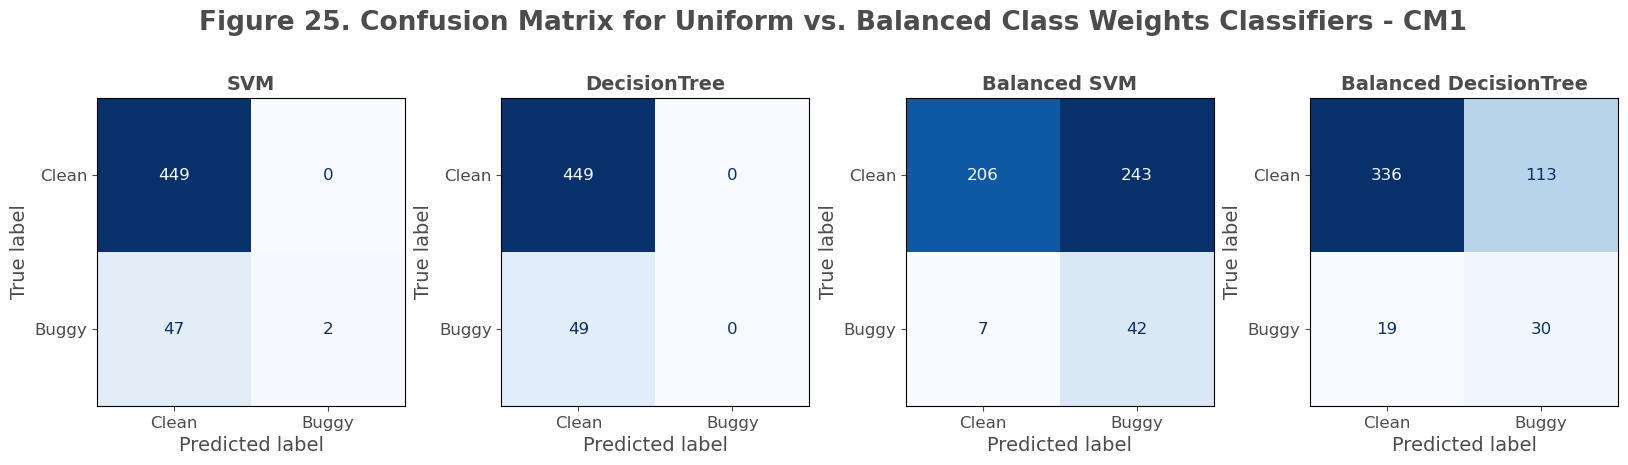

In [16]:
models_list = [{"model": svm_cv, "n_iter":150, 'probability':True},
               {'model': tree_cv},
               {"model": svm_cv, "n_iter":150, 'class_weight':'balanced', 'refit_metric':'balanced_accuracy', 'probability':True},
               {'model': tree_cv, 'class_weight':'balanced', 'refit_metric':'balanced_accuracy'}]

ax_cm1_res = compare_classifiers(cm1_mc, models_list, 'ax_cm1_results')
plt.suptitle('Figure 25. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - CM1',
               fontsize=19, fontweight='bold', y=1.1)

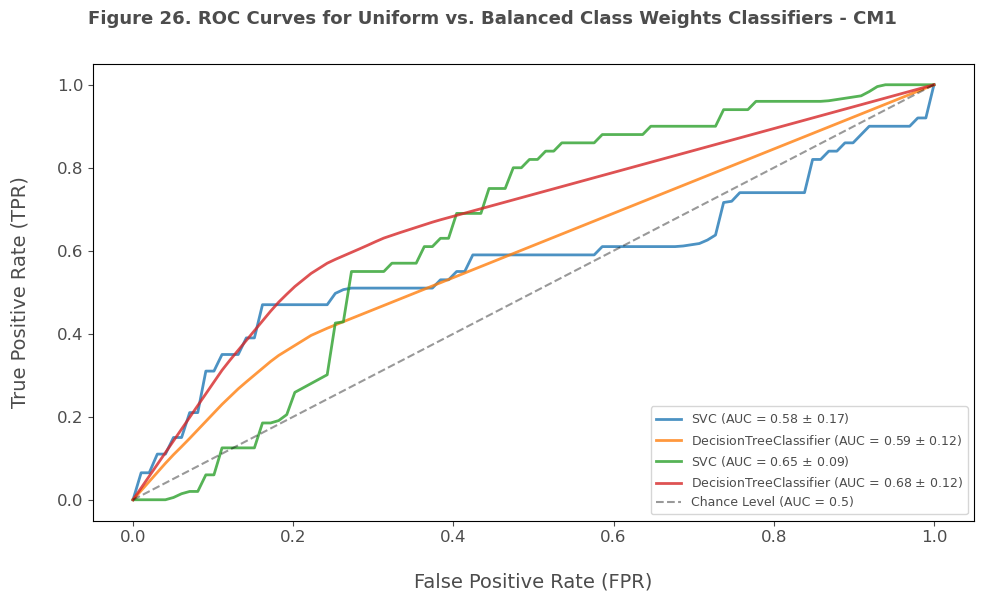

In [18]:
ax_cm1_auc = compare_roc(cm1_mc, ax_cm1_res['models'])
plt.suptitle('Figure 26. ROC Curves for Uniform vs. Balanced Class Weights Classifiers - CM1',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('ax_cm1_roc')

<br>

## 2️⃣  KC1

Text(0.5, 1.1, 'Figure 27. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - KC1')

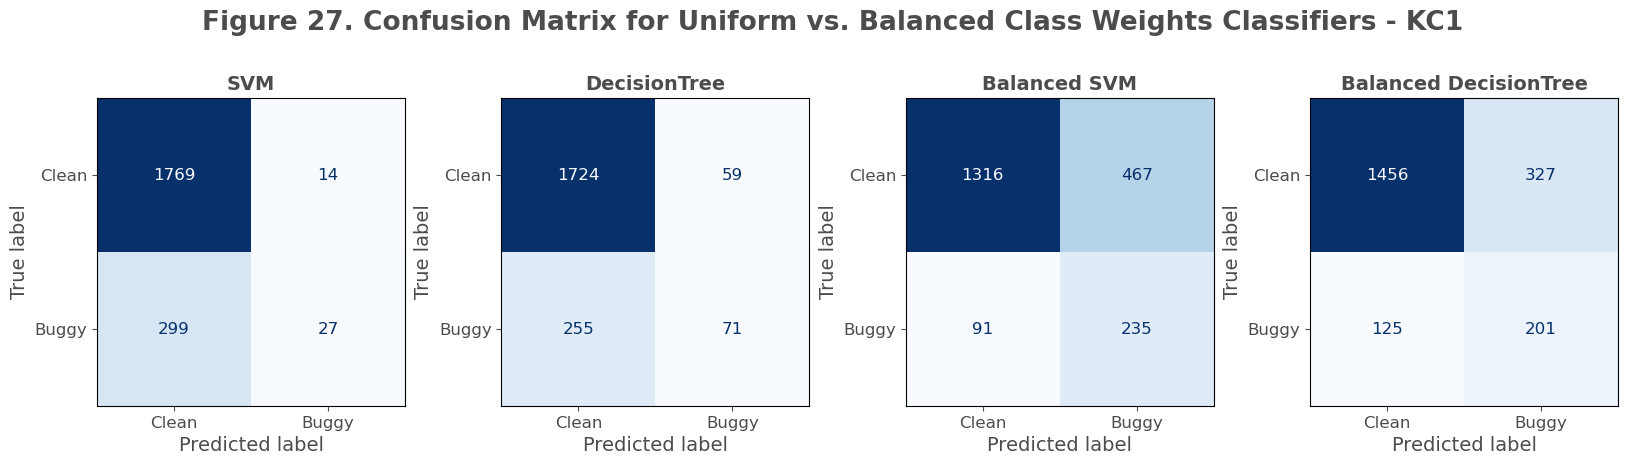

In [12]:
models_list = [{"model": svm_cv, "n_iter":50, 'probability':True},
               {'model': tree_cv},
               {"model": svm_cv, "n_iter":50, 'class_weight':'balanced' , 'probability':True, 'refit_metric':'balanced_accuracy' },
               {'model': tree_cv, 'class_weight':'balanced', 'refit_metric':'balanced_accuracy'}]

ax_kc1_res = compare_classifiers(kc1_mc, models_list, 'ax_kc1_results')
plt.suptitle('Figure 27. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - KC1',
               fontsize=19, fontweight='bold', y=1.1)

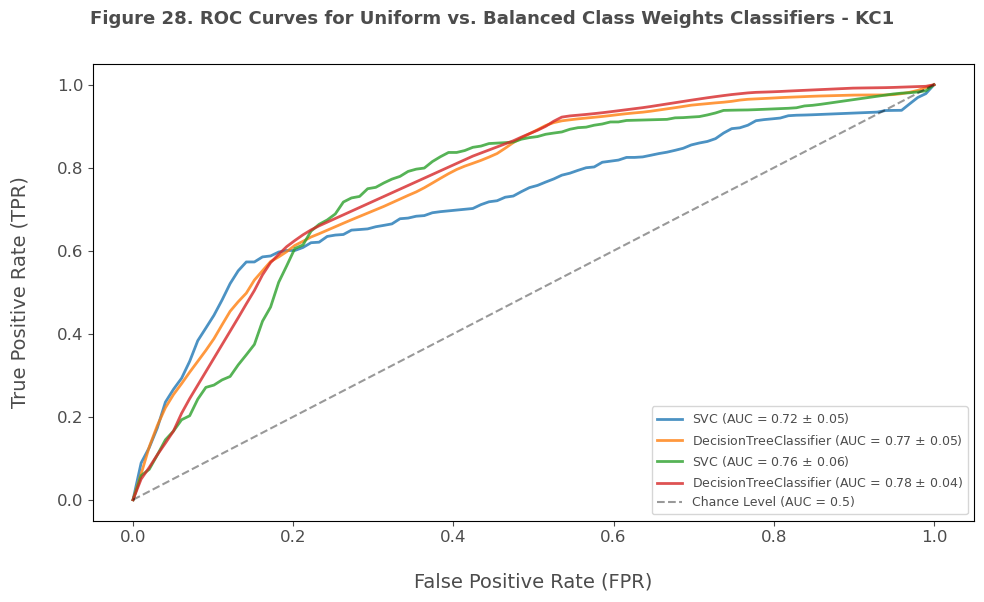

In [15]:
ax_kc1_auc = compare_roc(kc1_mc, ax_kc1_res['models'])
plt.suptitle('Figure 28. ROC Curves for Uniform vs. Balanced Class Weights Classifiers - KC1',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('ax_kc1_roc')

<br>

## 3️⃣ KC2 

Text(0.5, 1.1, 'Figure 29. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - KC2')

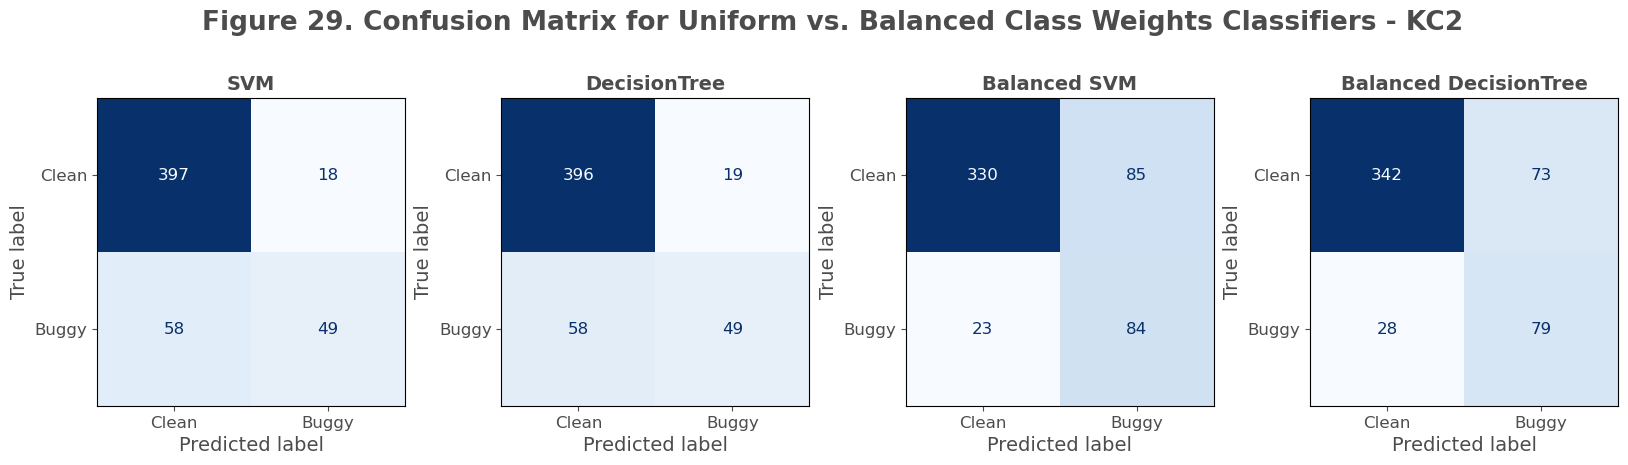

In [17]:
models_list = [{"model": svm_cv, "n_iter":150, 'probability':True},
               {'model': tree_cv},
               {"model": svm_cv, "n_iter":150, 'class_weight':'balanced','refit_metric':'balanced_accuracy', 'probability':True},
               {'model': tree_cv, 'class_weight':'balanced', 'refit_metric':'balanced_accuracy'}]

ax_kc2_res = compare_classifiers(kc2_mc, models_list, 'ax_kc2_results')
plt.suptitle('Figure 29. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - KC2',
               fontsize=19, fontweight='bold', y=1.1)

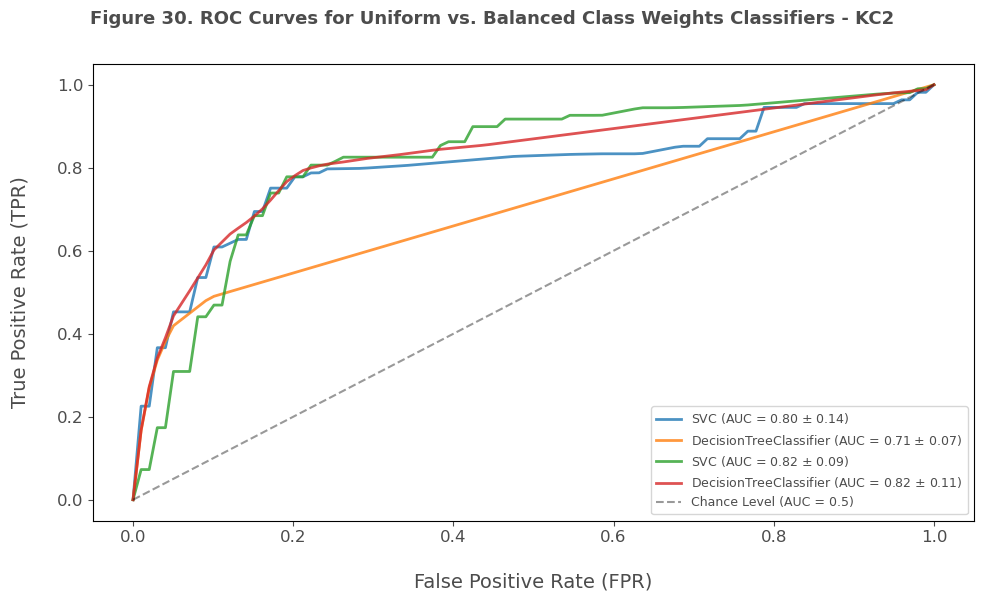

In [20]:
ax_kc2_auc = compare_roc(kc2_mc, ax_kc2_res['models'])
plt.suptitle('Figure 30. ROC Curves for Uniform vs. Balanced Class Weights Classifiers - KC2',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('ax_kc2_roc')

<br>

## 4️⃣ PC1

Text(0.5, 1.1, 'Figure 31. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - PC1')

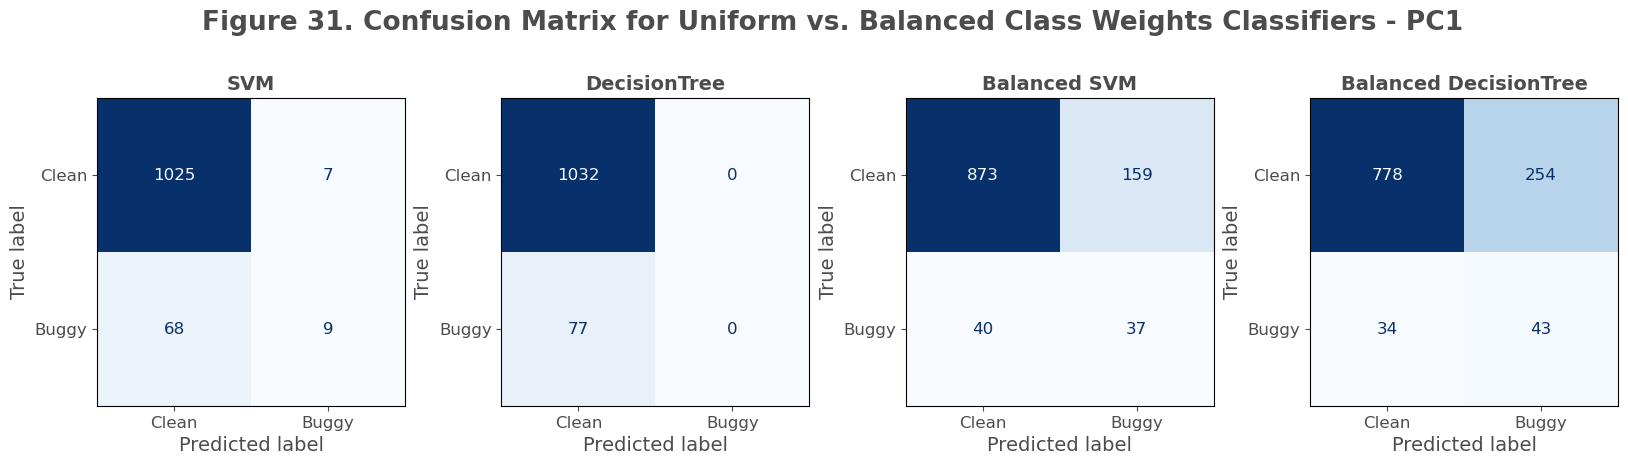

In [13]:
models_list = [{"model": svm_cv, "n_iter":50, 'probability':True},
               {'model': tree_cv},
               {"model": svm_cv, "n_iter":50, 'class_weight':'balanced' , 'probability':True, 'refit_metric':'balanced_accuracy' },
               {'model': tree_cv, 'class_weight':'balanced', 'refit_metric':'balanced_accuracy'}]

ax_pc1_res = compare_classifiers(pc1_mc, models_list, 'ax_pc1_results')
plt.suptitle('Figure 31. Confusion Matrix for Uniform vs. Balanced Class Weights Classifiers - PC1',
               fontsize=19, fontweight='bold', y=1.1)

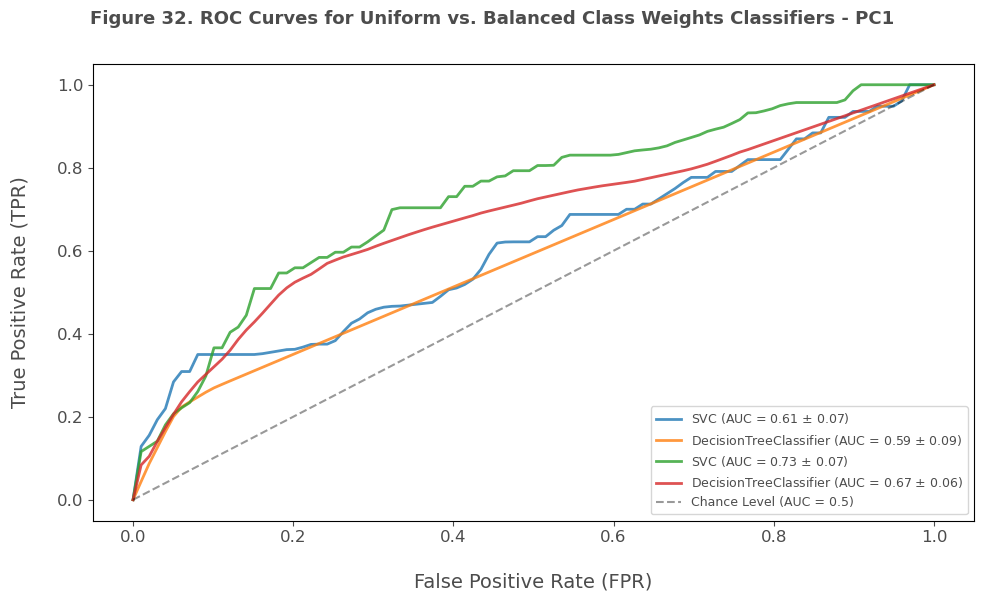

In [14]:
ax_pc1_auc = compare_roc(pc1_mc, ax_pc1_res['models'])
plt.suptitle('Figure 32. ROC Curves for Uniform vs. Balanced Class Weights Classifiers - PC1',
               fontsize=13, fontweight='bold', y=1.00)
save_fig('ax_pc1_roc')

***

In [19]:
# Collect the metrics computed on each dataset and classifier
ax_results = [ax_cm1_res, ax_kc1_res, ax_kc2_res, ax_pc1_res]
keys = ['accuracy', 'recall', 'auc']

# Dictionary comprehension to stack the values associated with each key in the dictionaries in results
ax_stacked_results = {key: np.stack([result[key] for result in ax_results]) for key in keys}

In [22]:
# Create a Df from the 2-d array stored in the stacked_results dict under 'accuracy' key
ax_accuracies = pd.DataFrame(ax_stacked_results['accuracy'], index = sets_str[:4], columns = ['SVM','TREE','SVM_BAL','TREE_BAL'])

# Display the new dataframe using styling options
df_display(ax_accuracies, 'Table 6. Accuracy Measure - Uniform vs. Balanced', highlight = True)

,SVM,TREE,SVM_BAL,TREE_BAL
cm1,0.906,0.902,0.498,0.735
kc1,0.852,0.851,0.735,0.786
kc2,0.854,0.853,0.793,0.807
pc1,0.932,0.931,0.821,0.740


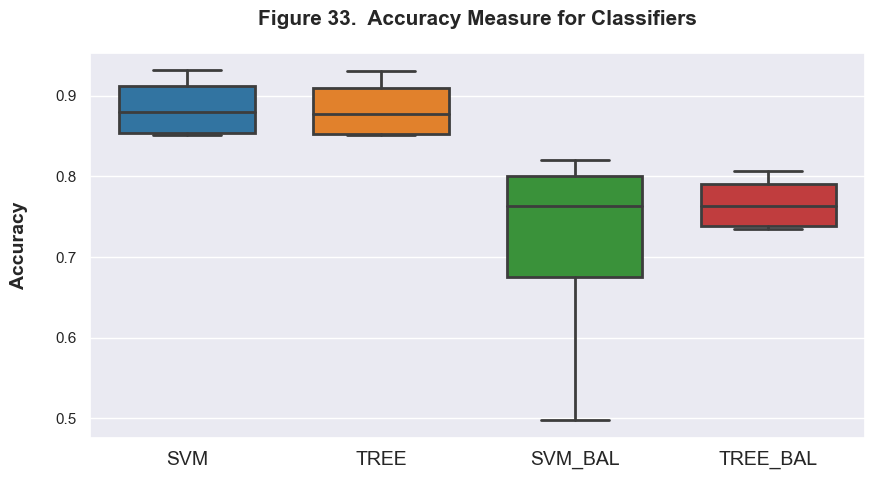

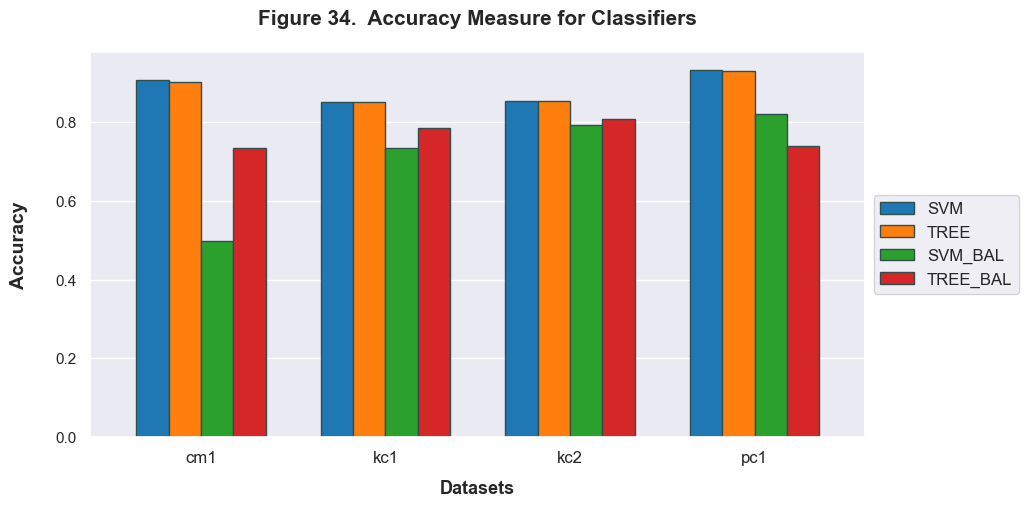

In [23]:
# Plot a boxplot and a barplot for the accuracy measures
plot_performance(ax_accuracies, "Accuracy", save=False, fig_num = 33)

In [26]:
# Create a Df from the 2-d array stored in the ax_stacked_results dict under 'recall' key
ax_recalls = pd.DataFrame(ax_stacked_results['recall'], index = sets_str[:4], columns = ['SVM','TREE','SVM_BAL','TREE_BAL'])

# Display the new dataframe using styling options
df_display(ax_recalls, 'Table 7. % Recall Measure - Uniform vs. Balanced', highlight = True, decimals = 2)

,SVM,TREE,SVM_BAL,TREE_BAL
cm1,4.00,0.00,86.00,61.50
kc1,8.27,21.71,72.03,61.60
kc2,46.00,46.00,78.73,73.64
pc1,11.61,0.00,48.04,55.89


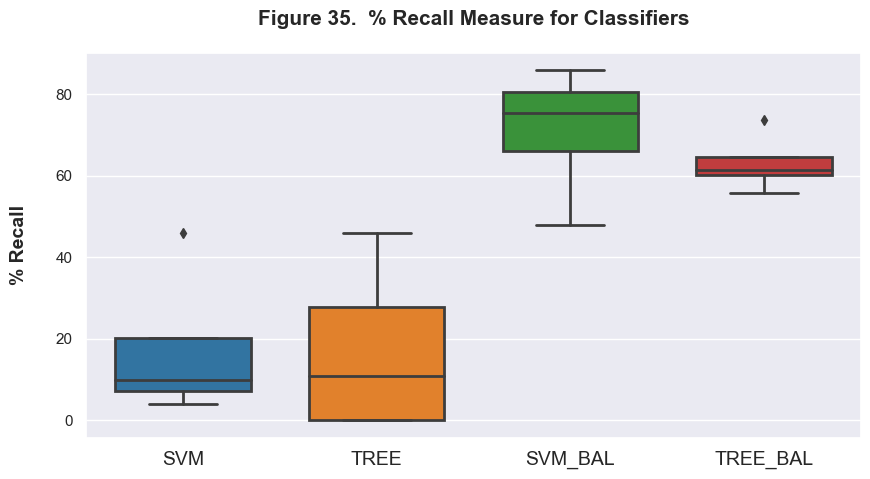

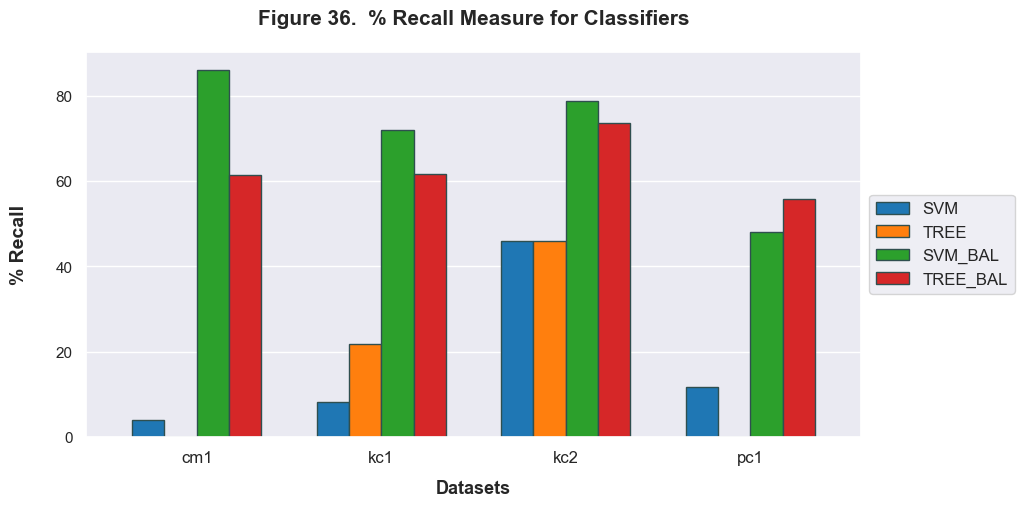

In [28]:
# Plot a boxplot and a barplot for the recall measures
plot_performance(ax_recalls, "% Recall", save=False, fig_num = 35)

In [30]:
# Create a Df from the 2-d array stored in the ax_stacked_results dict under 'auc' key
ax_aucs = pd.DataFrame(ax_stacked_results['auc'], index = sets_str[:4], columns = ['SVM','TREE','SVM_BAL','TREE_BAL'])

# Display the new dataframe using styling options
df_display(ax_aucs, 'Table 8. AUC Measure - Uniform vs. Balanced', highlight = True)

,SVM,TREE,SVM_BAL,TREE_BAL
cm1,0.574,0.592,0.653,0.682
kc1,0.723,0.774,0.757,0.778
kc2,0.798,0.707,0.821,0.825
pc1,0.608,0.588,0.726,0.675


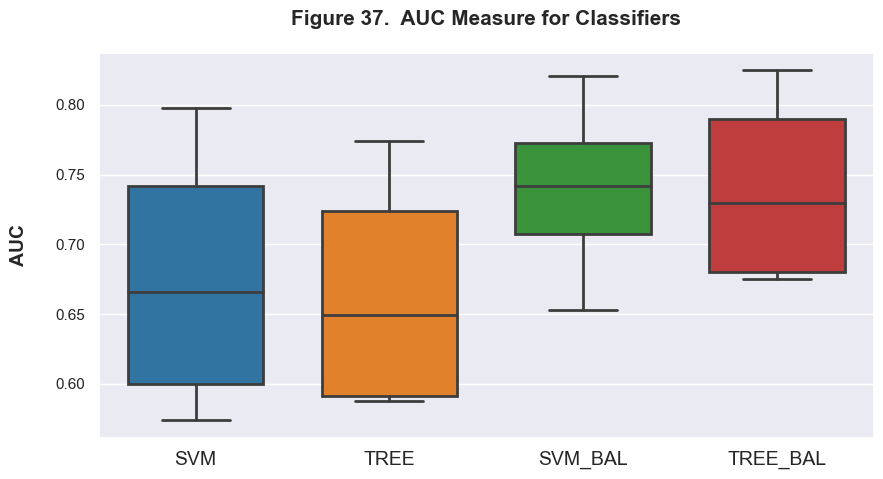

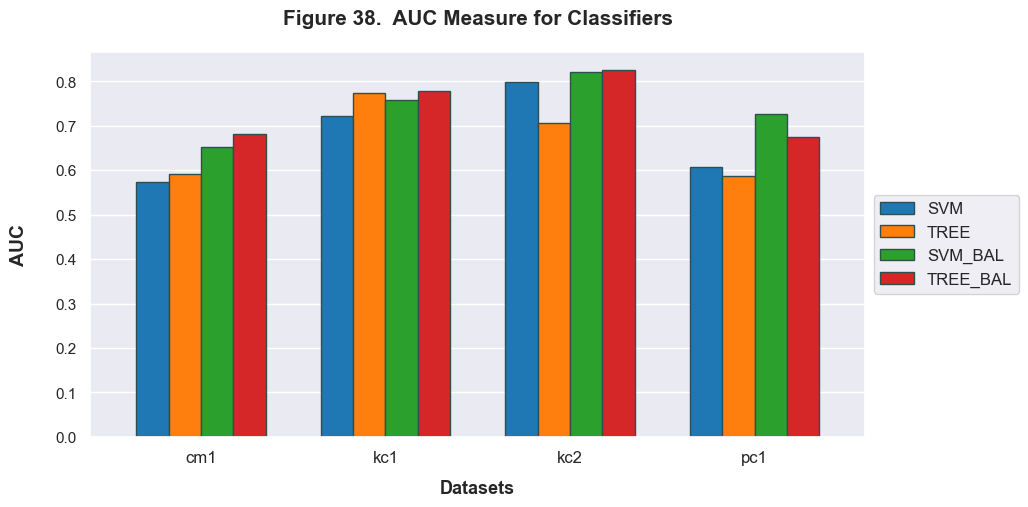

In [31]:
# Plot a boxplot and a barplot for the AUC measures
plot_performance(ax_aucs, "AUC", save=False, fig_num = 37)

<br>

***

<br>